<a href="https://colab.research.google.com/github/Karanmittalchd/Artificial-Intelligence/blob/main/State%20Estimation%20of%20an%20Autonomous%20agent/A1_COL864_a).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import cm
from matplotlib.pyplot import step, show

In [ ]:
sensors = [(8,15),(15,15),(15,22),(22,15)]
T = 25
start = (15,12)

In [ ]:
def sensor_model(s_l, a_l):
  """
    s_l -> location of sensor
    a_l -> location of agent
    returns the probability that the sensor present at s_l will report a detection if the robot is present at a_l
  """
  delta_x = abs(s_l[0] - a_l[0])
  delta_y = abs(s_l[1] - a_l[1])
  max_val = max(delta_x, delta_y)

  e = 0

  if (max_val == 0):
    e = 0.9
  elif max_val == 1:
    e = 0.8
  elif max_val == 2:
    e = 0.7
  elif max_val == 3:
    e = 0.6
  elif max_val == 4:
    e = 0.5
  else:
    e = 0

  return e

In [ ]:
def sensor_output(e):
  """
    e -> probability of dectection of presence of an agent
    returns the sensor observation based on e
  """
  r = np.random.choice(np.arange(1, 3), p=[e, 1-e])
  
  if r == 1:
    return 1
  else:
    return 0

## **Part A**

In [ ]:
def simulate (sensors, T = 25, start = (0,0)):
  """
  Arguments
  sensors -> list of coordinates of sensors
  T -> no of timesteps
  start -> starting position of the agent 

  Outputs
  path -> generated path by sampling from motion model
  actions -> list of actions followed by the agent
  sen_obs -> observations of sensors for each timestep
  """
  sen_obs = np.ndarray((T,len(sensors)))
  sen_lh = np.ndarray((T,len(sensors)))
  path = np.ndarray((T+1,2)) 
  path[0][0] = start[0]
  path[0][1] = start[1]
  actions = []
  for t in range (0,T):
    while 1:
      r = np.random.choice(np.arange(1, 5), p=[0.4, 0.1, 0.2, 0.3])
      if r == 1 and path[t][1] < 29:
        path[t+1][1] = path[t][1] + 1
        path[t+1][0] = path[t][0] 
        actions.append("Up")
        break
      if r == 2 and path[t][1] > 0:
        path[t+1][1] = path[t][1] - 1
        path[t+1][0] = path[t][0]
        actions.append("Down")
        break
      if r == 3 and path[t][0] > 0:
        path[t+1][1] = path[t][1]
        path[t+1][0] = path[t][0] - 1
        actions.append("Left")
        break
      if r == 4 and path[t][0] < 29:
        path[t+1][1] = path[t][1]
        path[t+1][0] = path[t][0] + 1
        actions.append("Right")
        break
    for i in range (0,4):
      sen_lh[t][i] = sensor_model(sensors[i],(path[t+1][0],path[t+1][1]))
      sen_obs[t][i] = sensor_output(sen_lh[t][i])
  return path, actions, sen_obs, sen_lh

In [ ]:
path,actions,sen_obs,sen_lh = simulate(sensors, T,start)

In [ ]:
 def plot_path(path,sensors):
  """
  Arguments
  path -> list of coordinates, on which agent was present
  sensors -> list of coordinates of sensor locations

  Output
  plots the path as well as sensors
  """
  plt.rcParams['axes.facecolor'] = 'white'
  L = path.shape[0]
  max_val = -1
  for i in range(0,L):
    plt.scatter(path[i][0]+0.5,path[i][1]+0.5,s = 100,c = "red")
    plt.text(path[i][0]+0.53, path[i][1]+.53, i , fontsize=15)
    max_val = max(max_val,max(path[i][0],path[i][1]))

  for s in sensors:
    plt.scatter(s[0]+0.5,s[1]+0.5,s = 100,c = "green")
    plt.text(s[0]+0.53, s[1]+0.53 , "s" , fontsize=15)
    max_val = max(max_val,max(s[0],s[1]))

  # plt.rcParams["figure.figsize"] = (1,12)
  # plt.xlim([0,30])
  # plt.ylim([0,30])
  plt.xticks(range(0, int(max_val+2)))
  plt.yticks(range(0, int(max_val+2)))
  plt.grid(True)
  plt.xlabel("X - coordinate")
  plt.ylabel("Y - coordinate")
  plt.rcParams["figure.figsize"] = (10,10)
  plt.show()


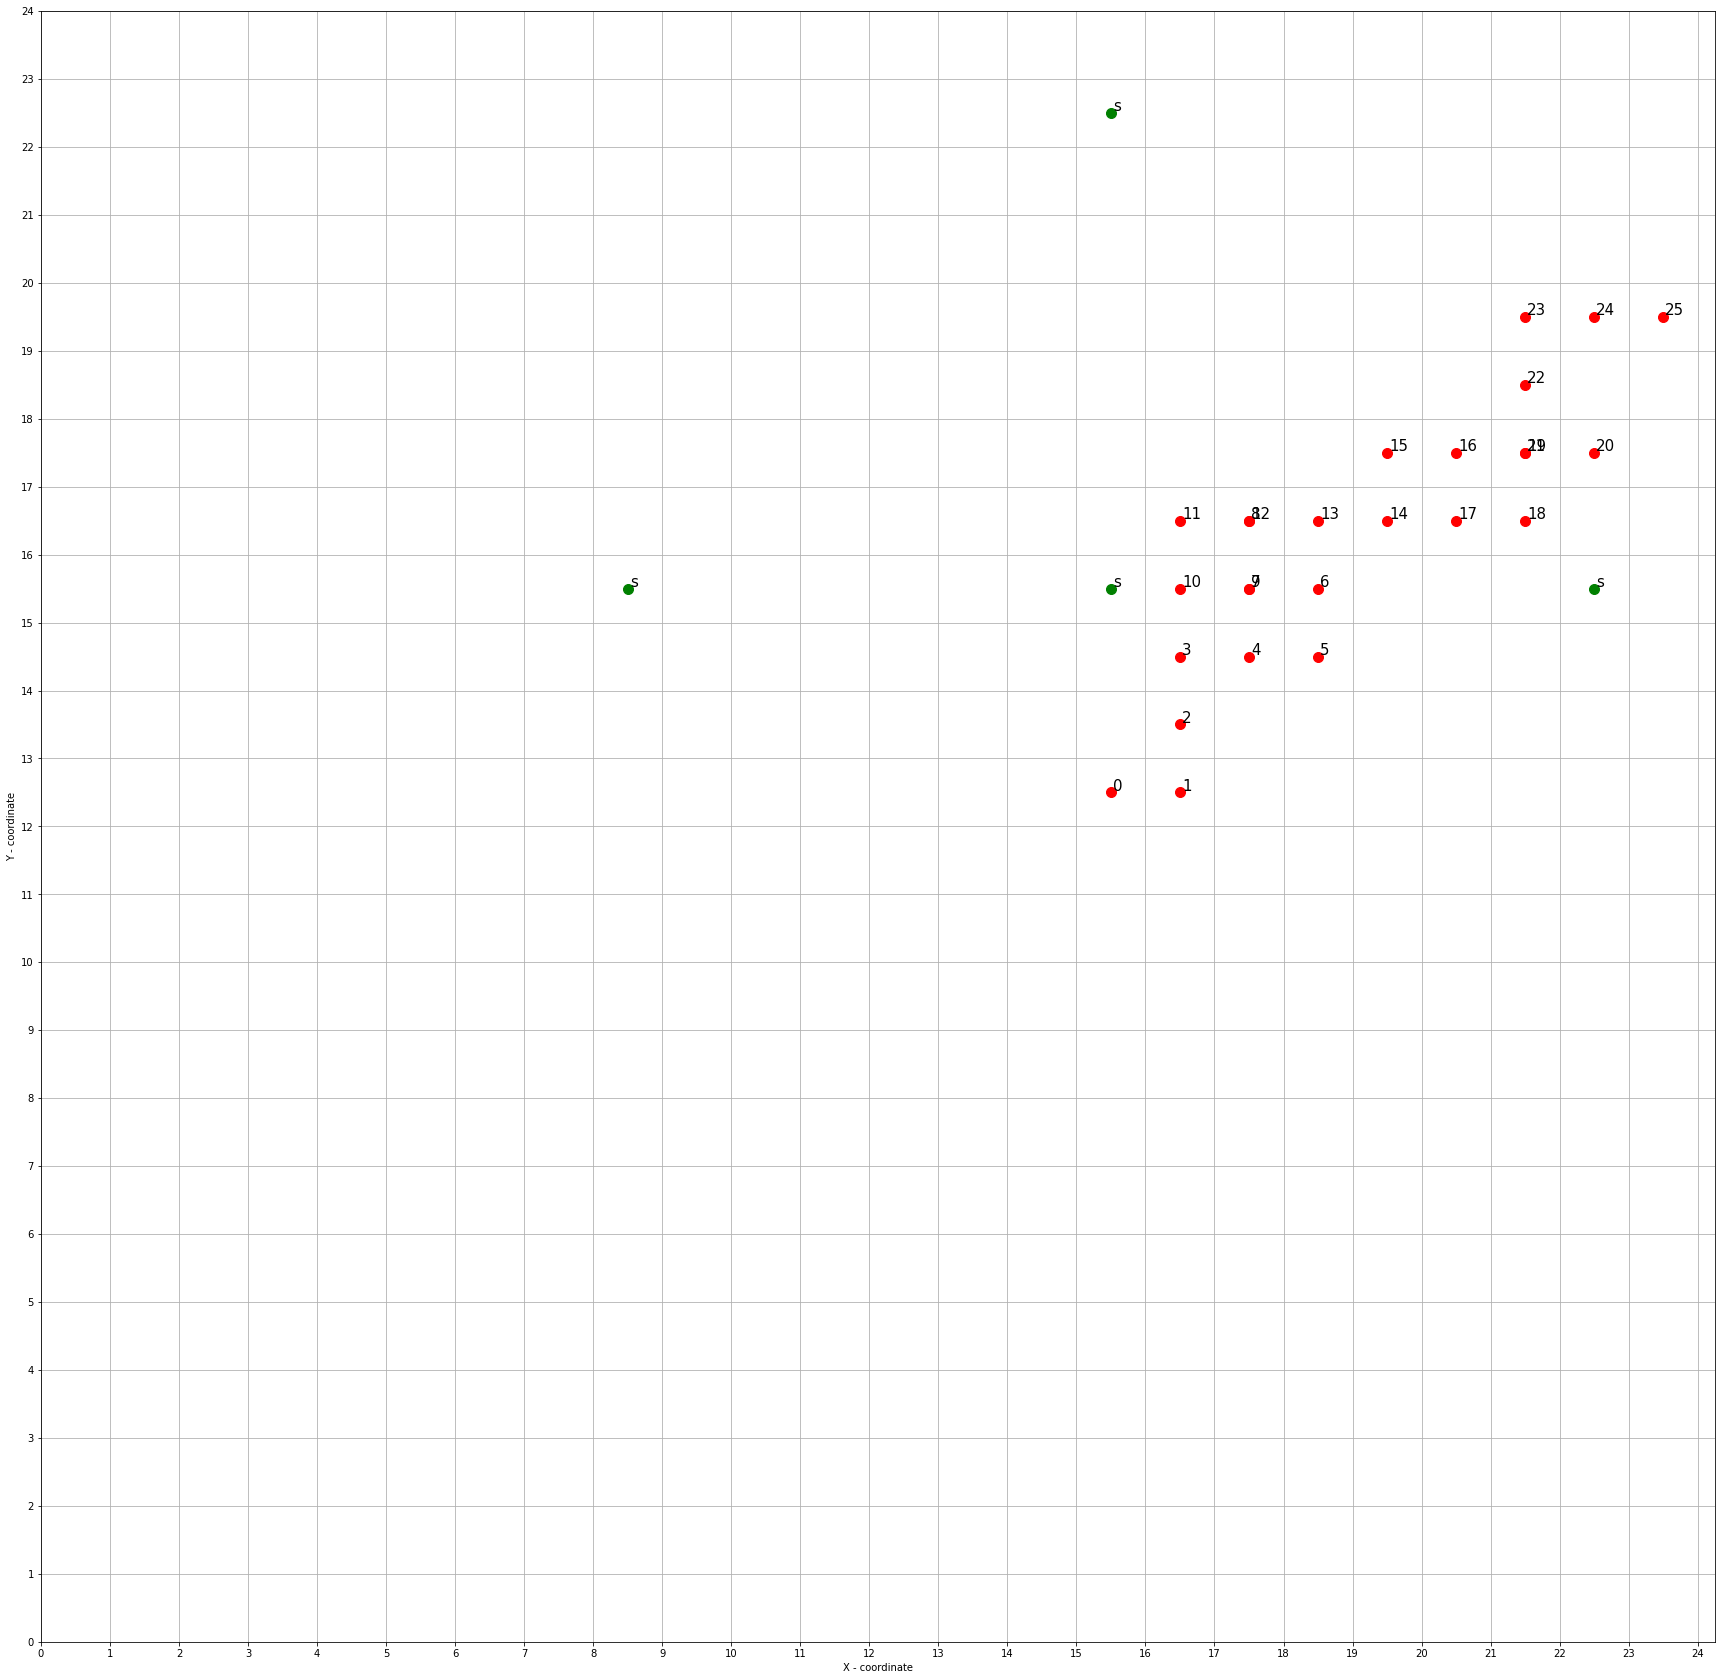

In [ ]:
plot_path(path,sensors)

In [ ]:
 def plot_path1(path,sensors):
  """
  Arguments
  path -> list of coordinates, on which agent was present
  sensors -> list of coordinates of sensor locations

  Output
  plots the path as well as sensors
  """
  L = path.shape[0]
  max_val = -1
  max_x=0
  min_x=29
  max_y=0
  min_y=29
  for i in range(L):
    max_x = max(path[i][0],max_x)
    min_x = min(path[i][0],min_x)
    max_y = max(path[i][1],max_y)
    min_y = min(path[i][1],min_y)
  for i in range(1,L):
    plt.rcParams['axes.facecolor'] = 'black'
    plt.subplot(5,5,i)
    plt.scatter(path[i][0]+0.5,path[i][1]+0.5,s = 200,c = "white", marker = "s")
    plt.title(f'Time Step : {i}')
    # plt.text(path[i][0]+0.53, path[i][1]+.53, i , fontsize=15)
    
    plt.xlabel("X - coordinate")
    plt.ylabel("Y - coordinate")
    max_val = max(max_val,max(path[i][0],path[i][1]))
    plt.xlim([int(min(min_x,min_y)),int(max(max_x,max_y))+1])
    plt.ylim([int(min(min_x,min_y)),int(max(max_x,max_y))+1])
    plt.xticks(range(int(min(min_x,min_y)),int(max(max_x,max_y))+1))
    plt.yticks(range(int(min(min_x,min_y)),int(max(max_x,max_y))+1))
    plt.grid(True)
    

  # for s in sensors:
  #   plt.scatter(s[0]+0.5,s[1]+0.5,s = 100,c = "green")
  #   plt.text(s[0]+0.53, s[1]+0.53 , "s" , fontsize=15)
  #   max_val = max(max_val,max(s[0],s[1]))

  # plt.rcParams["figure.figsize"] = (1,12)

  plt.rcParams["figure.figsize"] = (30,30)
  plt.show()

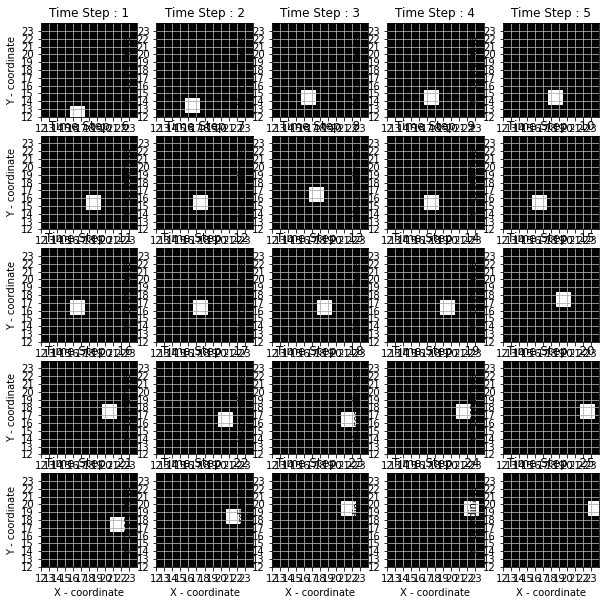

In [ ]:
plot_path1(path,sensors)

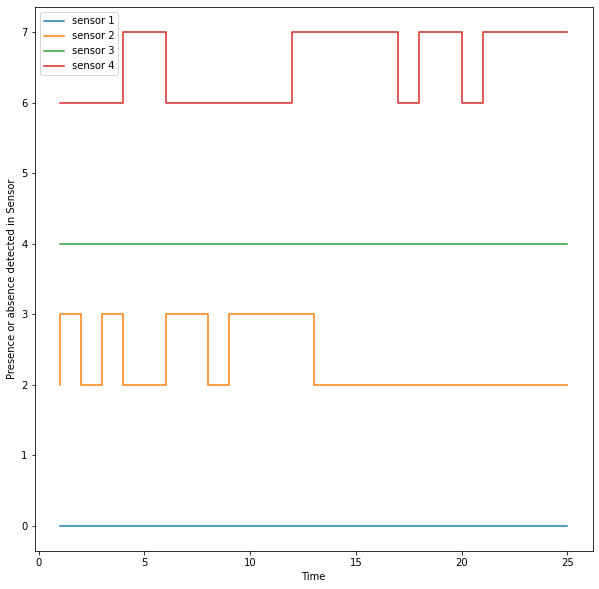

In [ ]:
def waveform(data, T, yshift):
  output = []
  for i in range(0,T):
    if data[i] == 0:
      output.append(yshift)
    else:
      output.append(yshift+1)
  return output
plt.rcParams['axes.facecolor'] = 'white'
sen_obs1 = ((sen_obs[:,0:1]).reshape((T,))).tolist()
sen_obs2 = ((sen_obs[:,1:2]).reshape((T,))).tolist()
sen_obs3 = ((sen_obs[:,2:3]).reshape((T,))).tolist()
sen_obs4 = ((sen_obs[:,3:4]).reshape((T,))).tolist()

waveform1 = waveform(sen_obs1, T, 0)
waveform2 = waveform(sen_obs2, T, 2)
waveform3 = waveform(sen_obs3, T, 4)
waveform4 = waveform(sen_obs4, T, 6) 

x1 = np.arange(1, T+1)
x2 = np.arange(1, T+1)
x3 = np.arange(1, T+1)
x4 = np.arange(1, T+1)

y1 = np.array(waveform1)
y2 = np.array(waveform2)
y3 = np.array(waveform3)
y4 = np.array(waveform4)
plt.rcParams["figure.figsize"] = (10,10)
step(x1, y1, x2, y2, x3, y3, x4, y4)
plt.legend(["sensor 1","sensor 2", "sensor 3","sensor 4"])
plt.xlabel("Time")
plt.ylabel("Presence or absence detected in Sensor")
plt.show()


## **Part B**

In [ ]:
def update_belief(update, old_belief, sensor_data = (0,0)):

  new_belief = np.zeros((30,30),dtype =float)

  if update == "action_data":
    for i in range(0,30):
      for j in range(0,30):

        sum = 0

        if i>0:
          # moved right 
          sum = sum + 0.3*old_belief[i-1][j]

        if i<29:
          # moved left 
          sum = sum + 0.2*old_belief[i+1][j]

        if j>0:
          # moved up 
          sum = sum + 0.4*old_belief[i][j-1]

        if j<29:
          # moved down 
          sum = sum + 0.1*old_belief[i][j+1]

        new_belief[i][j] = sum

  else:

    eta = 0 # normalization constant

    for i in range(0,30):
      for j in range(0,30):

        if sensor_data[0] == 1:

          new_belief[i][j] = old_belief[i][j] * sensor_model(sensor_data[1], (i,j))
          eta = eta + new_belief[i][j]

        else:

          new_belief[i][j] = old_belief[i][j] * (1 - sensor_model(sensor_data[1], (i,j)))
          eta = eta + new_belief[i][j]

    if eta!= 0:
      new_belief = new_belief / eta
    
  return new_belief


def update_backward(old_backward,sensor_data,sensors):
  new_backward = np.zeros((30,30),dtype =float)

  for i in range(0,30):
      for j in range(0,30):

        sum = 0
        
        if i<29:
          # move right 
          sum = sum + 0.3*old_backward[i+1][j]* sensor_return(sensor_data,i+1,j,sensors)

        if i>0:
          # move left 
          sum = sum + 0.2*old_backward[i-1][j]* sensor_return(sensor_data,i-1,j,sensors)

        if j<29:
          # move up 
          sum = sum + 0.4*old_backward[i][j+1]* sensor_return(sensor_data,i,j+1,sensors)

        if j>0:
          # move down 
          sum = sum + 0.1*old_backward[i][j-1]* sensor_return(sensor_data,i,j-1,sensors)

        
          
        new_backward[i][j] = sum

  return new_backward

def sensor_return(sensor_data,i,j,sensors):
  pdt = 1
  for s in range (0,len(sensors)):
    if sensor_data[s] == 1:
      pdt = pdt*sensor_model(sensors[s],(i,j))
    else:
      pdt = pdt*(1-sensor_model(sensors[s],(i,j)))
  # if sensor_data[1] == 1:
  #   pdt = pdt*sensor_model(sensors[1],(i,j))
  # else:
  #   pdt = pdt*(1-sensor_model(sensors[1],(i,j)))
  # if sensor_data[2] == 1:
  #   pdt = pdt*sensor_model(sensors[2],(i,j))
  # else:
  #   pdt = pdt*(1-sensor_model(sensors[2],(i,j)))
  # if sensor_data[3] == 1:
  #   pdt = pdt*sensor_model(sensors[3],(i,j))
  # else:
  #   pdt = pdt*(1-sensor_model(sensors[3],(i,j)))
  return pdt

def update_future(old_belief):
  
  new_belief = np.zeros((30,30),dtype =float)

  for i in range(0,30):
    for j in range(0,30):

      sum = 0

      if i>0:
        # moved right 
        sum = sum + 0.3*old_belief[i-1][j]

      if i<29:
        # moved left 
        sum = sum + 0.2*old_belief[i+1][j]

      if j>0:
        # moved up 
        sum = sum + 0.4*old_belief[i][j-1]

      if j<29:
        # moved down 
        sum = sum + 0.1*old_belief[i][j+1]

      new_belief[i][j] = sum

  return new_belief

def most_likely_sequence_probability (update,old_belief,sensor_data = (0,0)):

  new_belief = np.zeros((30,30,2))

  if update == "action_data":

    for i in range(0,30):
      for j in range(0,30):

        maximum = -1
        max_state = -1

        if i>0:
          # moved right
          
          if (0.3*old_belief[i-1][j][0] > maximum):
            maximum = 0.3*old_belief[i-1][j][0]
            max_state = (i-1)*30 + j

        if i<29:
          # moved left 
          if (0.2*old_belief[i+1][j][0] > maximum):
            maximum = 0.2*old_belief[i+1][j][0]
            max_state = (i+1)*30 + j

        if j>0:
          # moved up 

          if (0.4*old_belief[i][j-1][0] > maximum):
            maximum = 0.4*old_belief[i][j-1][0]
            max_state = (i)*30 + (j-1)


        if j<29:
          # moved down 

          if (0.1*old_belief[i][j+1][0] > maximum):
            maximum = 0.1*old_belief[i][j+1][0]
            max_state = (i)*30 + (j+1)

        new_belief[i][j][0] = maximum
        new_belief[i][j][1] = max_state


  else:

    eta = 0 # normalization constant

    for i in range(0,30):
      for j in range(0,30):

        if sensor_data[0] == 1:

          new_belief[i][j][0] = old_belief[i][j][0] * sensor_model(sensor_data[1], (i,j))
          eta = eta + new_belief[i][j][0]
          new_belief[i][j][1] = old_belief[i][j][1]

        else:

          new_belief[i][j][0] = old_belief[i][j][0] * (1 - sensor_model(sensor_data[1], (i,j)))
          eta = eta + new_belief[i][j][0]
          new_belief[i][j][1] = old_belief[i][j][1]

    for i in range(0,30):
      for j in range(0,30):
        if eta!= 0:
          new_belief[i][j][0] = new_belief[i][j][0] / eta
    
  return new_belief


In [ ]:
belief = np.ndarray((T+1,30,30))
belief[0] = np.full((30,30),1/900,dtype=float)

# update belief for next T time steps
for i in range(0,T):
  belief[i+1] = update_belief("action_data",belief[i])
  for j in range (0,len(sensors)):
    belief[i+1] = update_belief("perceptual_data",belief[i+1],(sen_obs[i][j],sensors[j]))



In [ ]:
backward = np.ndarray((T+1,30,30))
backward[T]=np.full((30,30),1,dtype=float)

#update backward
for i in range(T,0,-1):
  backward[i-1] = update_backward(backward[i],sen_obs[i-1],sensors)

In [ ]:
def smoothing(backward,belief,k,T):
  val = np.multiply(backward[k],belief[k])
  val = val/np.sum(val)
  return val

In [ ]:
np.unravel_index(np.argmax(smoothing(backward,belief,4,T),axis = None),smoothing(backward,belief,0,T).shape)

(17, 12)

In [ ]:
estimate = np.unravel_index(np.argmax(belief[T],axis = None),belief[T].shape)

In [ ]:
print(estimate)

(22, 17)


In [ ]:
print(belief[T][estimate[0]][estimate[1]])

0.06187875602545404


## **Part B HeatMap**

In [ ]:
def heat_map(belief,t):
  linewidths = 0
  linecolor = "black"
  hm = sb.heatmap(data = np.transpose(belief[t]),linewidths=linewidths,linecolor=linecolor, cmap="Greys_r")
  hm.invert_yaxis()


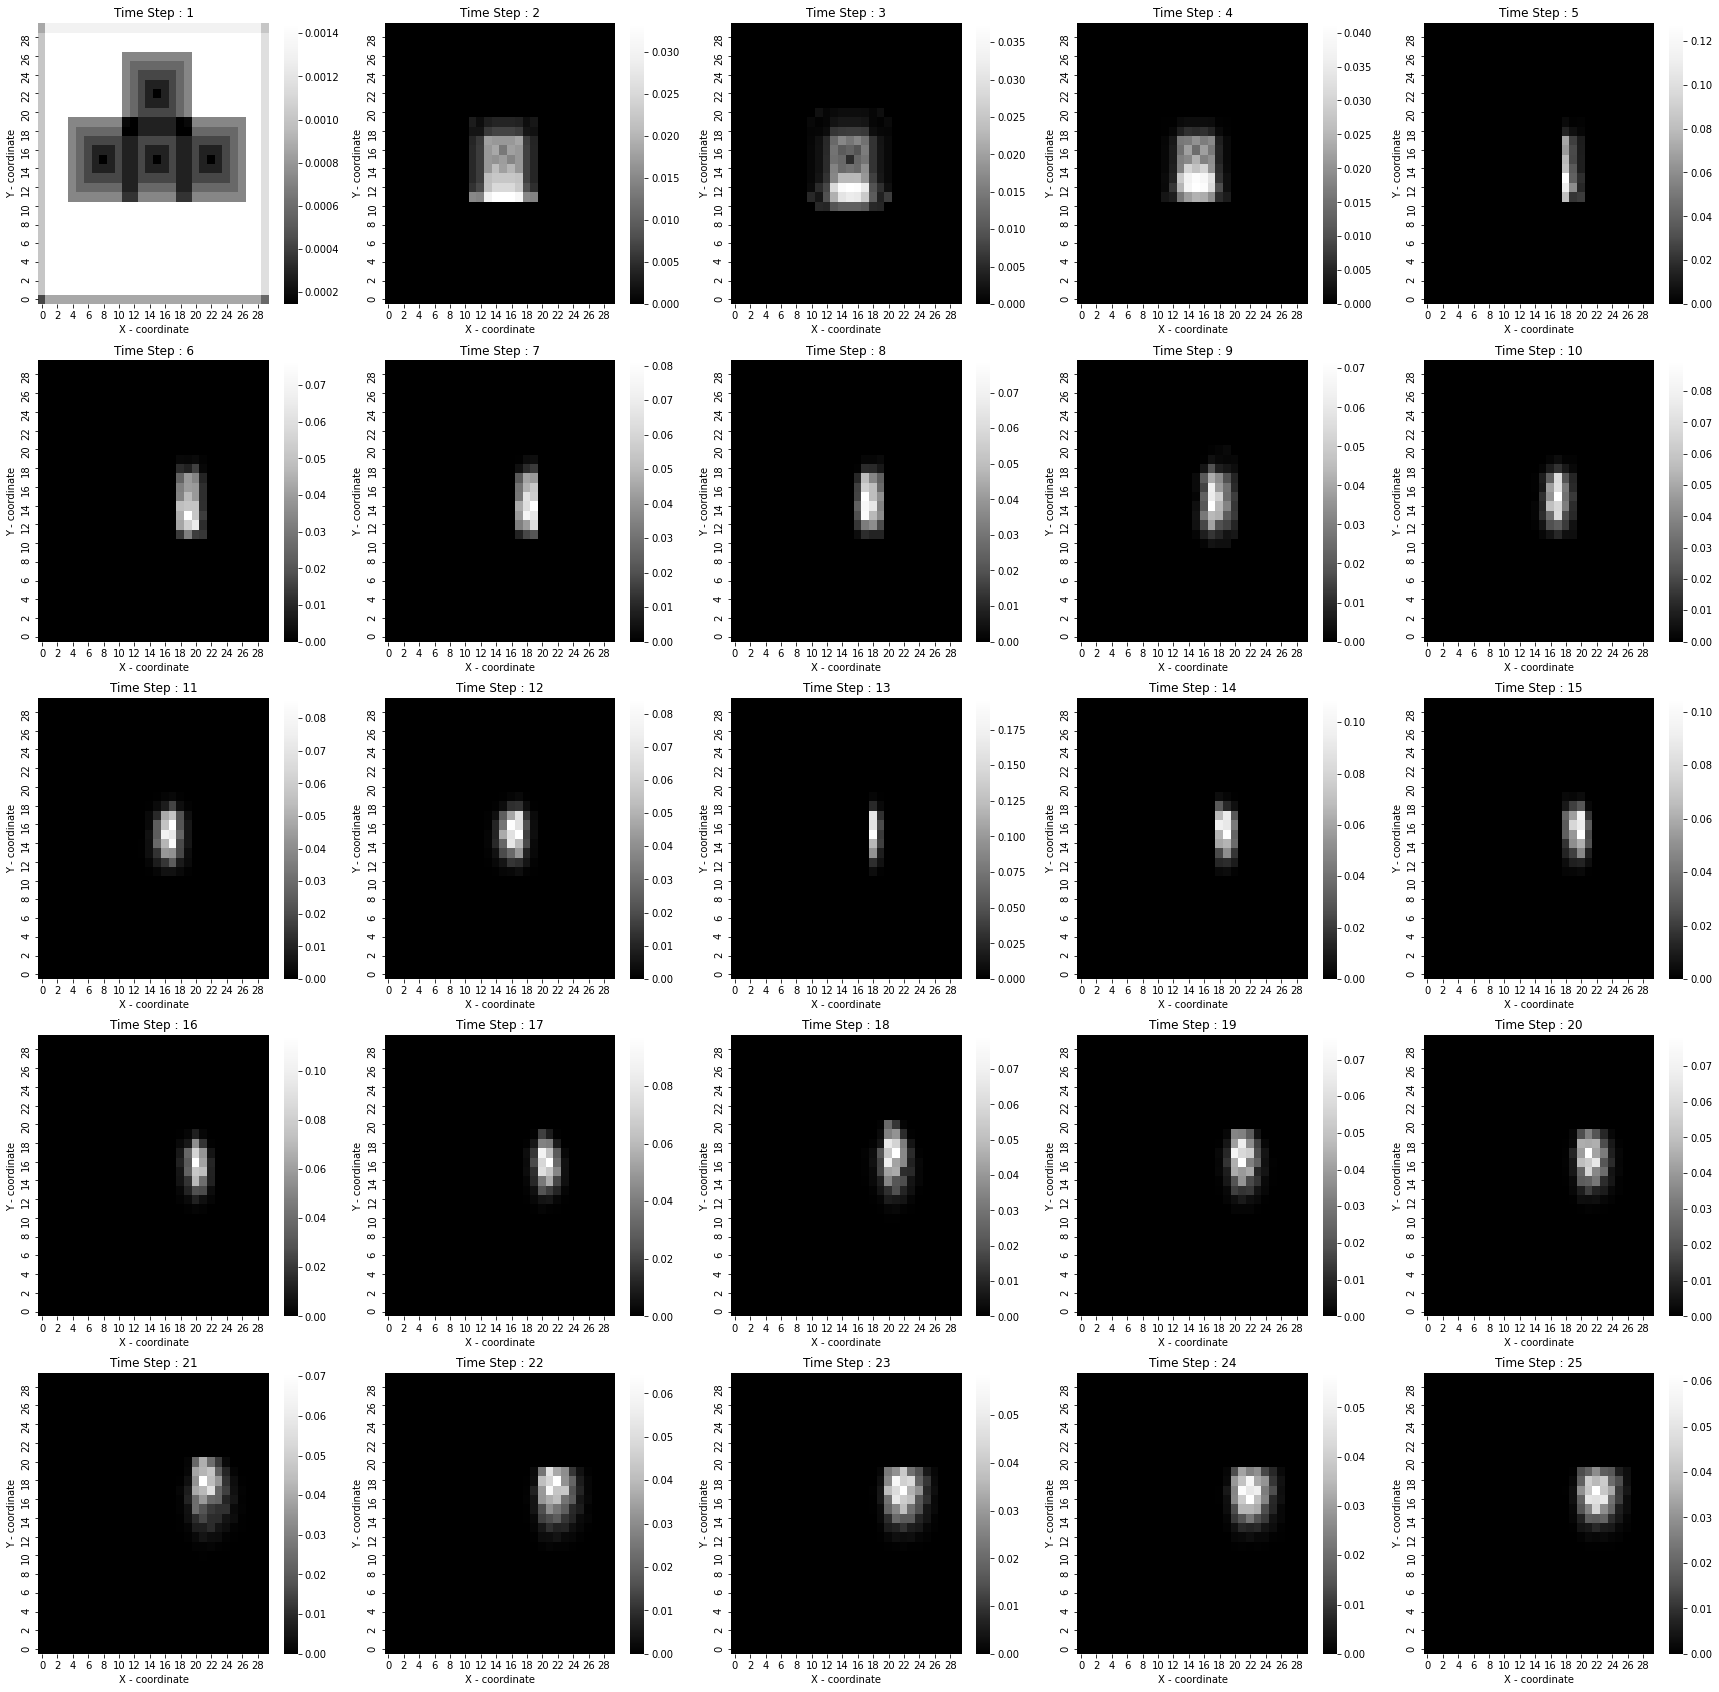

In [ ]:
for i in range(0,T):
  plt.subplot(5,5,i+1)
  heat_map(belief,i+1)
  plt.title(f'Time Step : {i+1}')
  plt.xlabel("X - coordinate")
  plt.ylabel("Y - coordinate")
plt.rcParams["figure.figsize"] = (30,30)

## **Part B Log-likelihood**

In [ ]:
 def log_plot(belief): 
  x = y = np.arange(0, 30, 1)
  X, Y = np.meshgrid(x, y)
  belief_clip = np.clip(np.log(belief), a_min = -10, a_max = 1)
  fig = plt.figure(figsize=(30,30))
  for t in range(1,T+1):
      Z = belief_clip[t]  
       
      ax = fig.add_subplot(5, 5, t, projection='3d')
      # ax = plt.axes(projection ='3d') 
      # ax.subplot(5,5,i)  
      ax.set_xlabel("X - coordinate")
      ax.set_ylabel("Y - coordinate")
      ax.set_zlabel("Log Likelihood")
      ax.text2D(0.5, 0.95, "Time Step: " + str(t), transform=ax.transAxes)
      p = ax.plot_surface(X,Y,Z,rstride=1, cstride=1,
                    cmap='summer', edgecolor='none') 
  
  plt.show() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


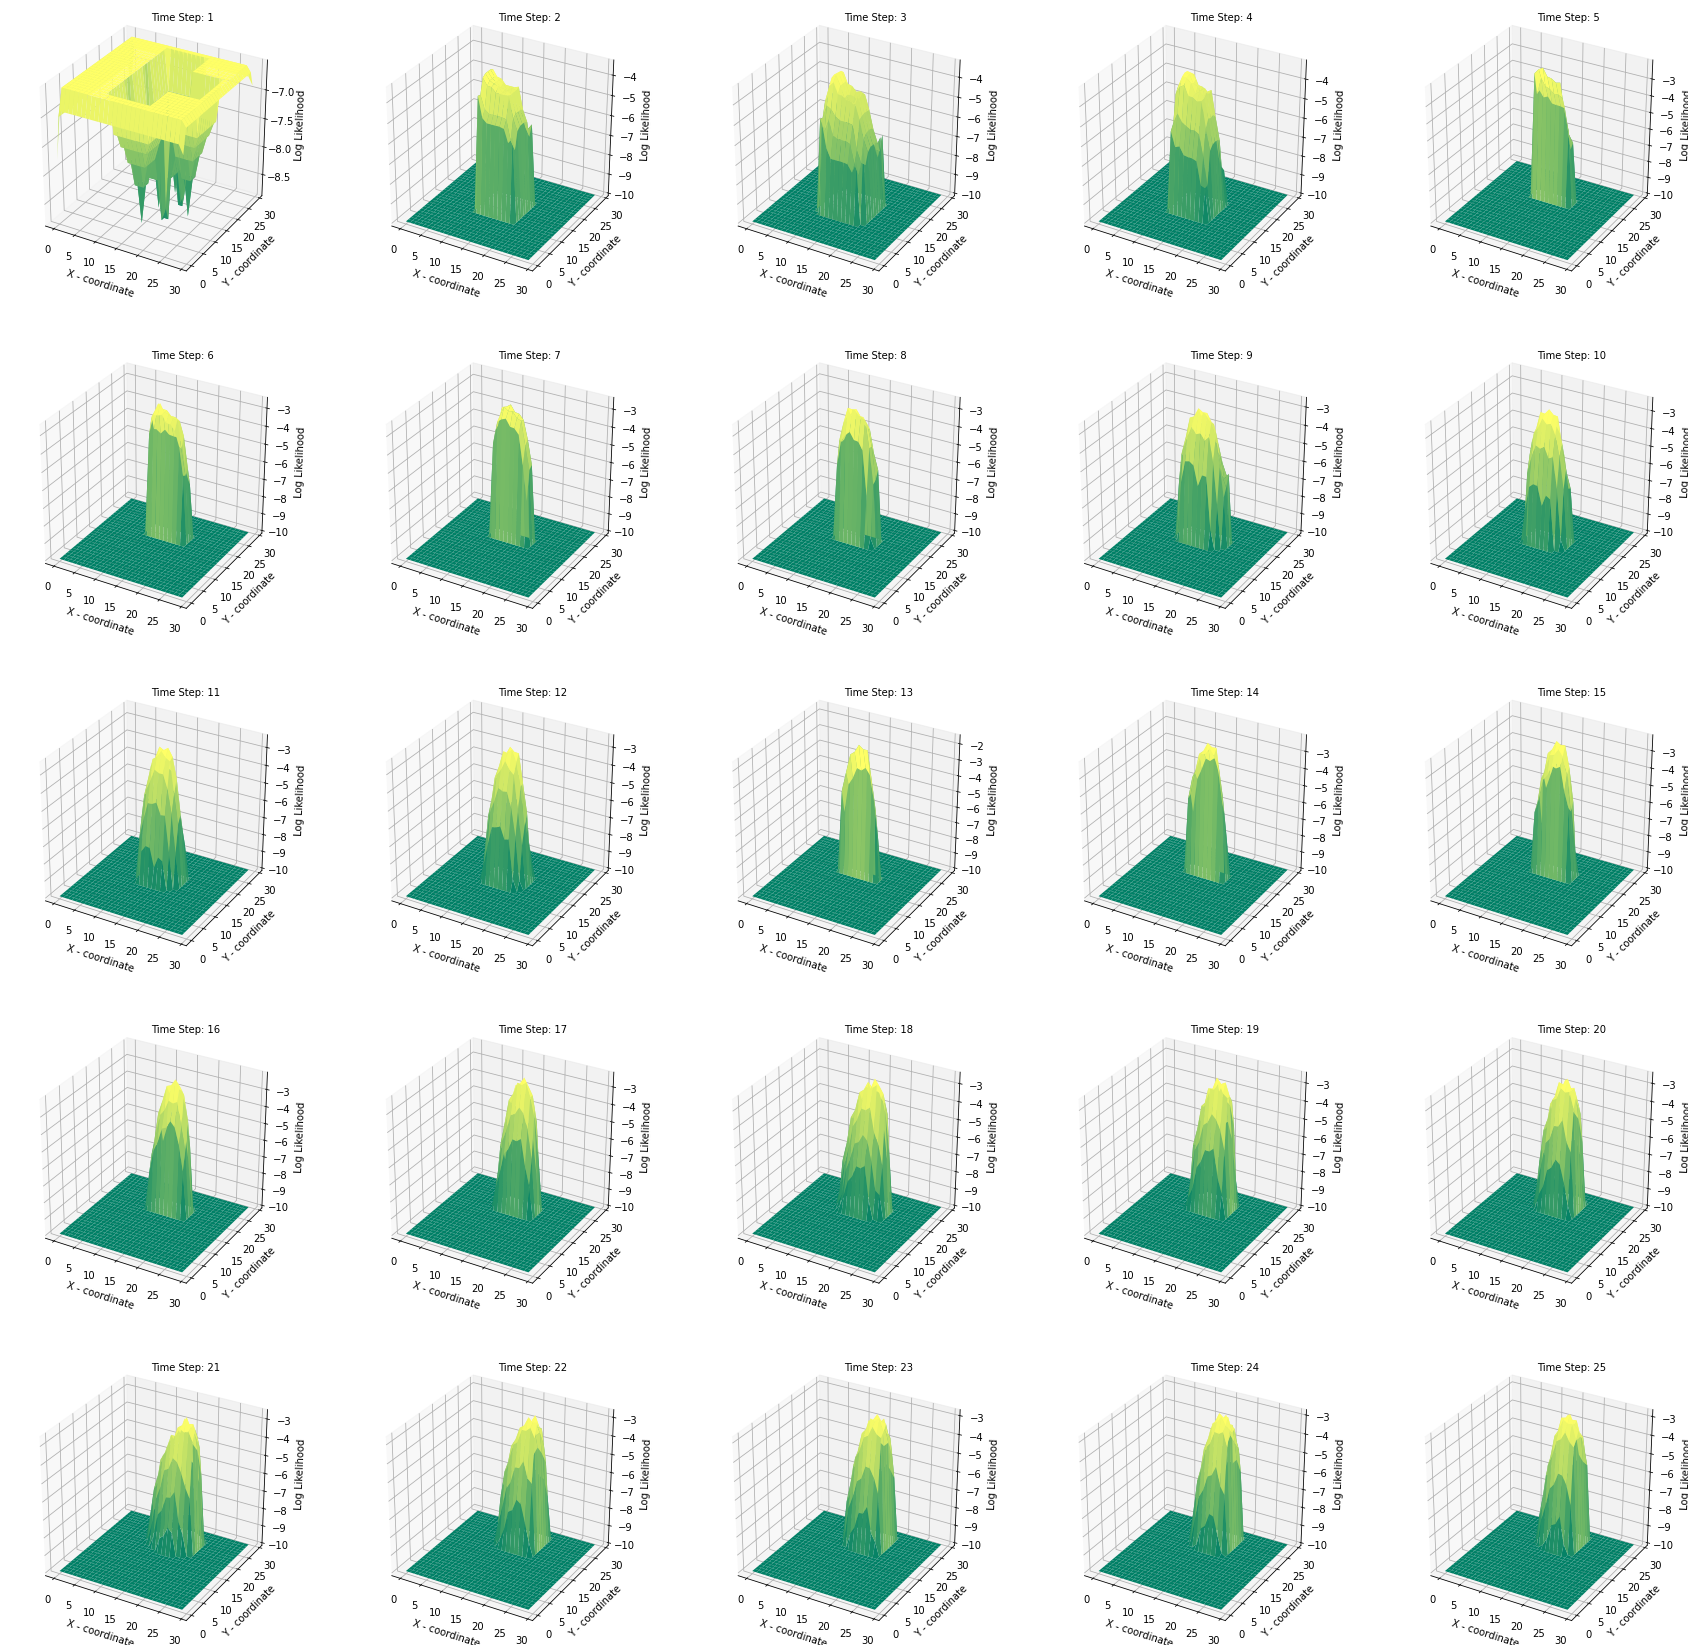

In [ ]:
log_plot(belief)


## **Part B Estimated and Ground Truth Locations**

In [ ]:
# def plot_b(path,belief,t):
#   plt.scatter(path[t][0]+0.5,path[t][1]+0.5,s = 100,c = "red")
#   plt.text(path[t][0]+0.53, path[t][1]+.53, "True" , fontsize=15)

#   estimate = np.unravel_index(np.argmax(belief[t],axis = None),belief[t].shape)
#   plt.scatter(estimate[0]+0.5,estimate[1]+0.5,s = 100,c = "green")
#   plt.text(estimate[0]+0.53, estimate[1]+0.53 , "Estimated" , fontsize=15)

#   # plt.rcParams["figure.figsize"] = (1,12)
#   plt.xlim([0,30])
#   plt.ylim([0,30])
#   plt.xticks(range(0, 30))
#   plt.yticks(range(0, 30))
#   plt.grid(True)
#   plt.rcParams["figure.figsize"] = (10,10)
#   plt.show()

In [ ]:
def plot_b(path,belief):
  L = path.shape[0]
  max_val = -1
  max_x=0
  min_x=29
  max_y=0
  min_y=29
  legend = plt.legend()
  plt.setp(legend.get_texts(), color='w')
  for i in range(1,L):
    estimate = np.unravel_index(np.argmax(belief[i],axis = None),belief[i].shape)
    # print(estimate[0]," ", estimate[1])
    max_x = max(path[i][0],estimate[0],max_x)
    min_x = min(path[i][0],estimate[0],min_x)
    max_y = max(path[i][1],estimate[1],max_y)
    min_y = min(path[i][1],estimate[1],min_y)
  for i in range(1,L):
    plt.rcParams['axes.facecolor'] = 'black'
    plt.subplot(5,5,i)
    estimate = np.unravel_index(np.argmax(belief[i],axis = None),belief[i].shape)
    plt.scatter(estimate[0]+0.4,estimate[1]+0.4,s = 200,c = "green", marker = "s", label = "Estimated")
    plt.scatter(path[i][0]+0.6,path[i][1]+0.6,s = 200,c = "red", marker = "s", label = "Actual")
    # plt.text(path[i][0]+0.53, path[i][1]+.53, i , fontsize=15)

    plt.grid(True) 
    # plt.legend(["Estimated","Actual"])
    plt.title(f'Time Step : {i}')
    
    plt.xlabel("X - coordinate")
    plt.ylabel("Y - coordinate")
    plt.xlim([int(min(min_x,min_y)),int(max(max_x,max_y))+1])
    plt.ylim([int(min(min_x,min_y)),int(max(max_x,max_y))+1])
    plt.xticks(range(int(min(min_x,min_y)),int(max(max_x,max_y))+1))
    plt.yticks(range(int(min(min_x,min_y)),int(max(max_x,max_y))+1))
     

  # for s in sensors:
  #   plt.scatter(s[0]+0.5,s[1]+0.5,s = 100,c = "green")
  #   plt.text(s[0]+0.53, s[1]+0.53 , "s" , fontsize=15)
  #   max_val = max(max_val,max(s[0],s[1]))

  legend = plt.legend(prop={"size":20})
  plt.setp(legend.get_texts(), color='w')
  plt.rcParams["figure.figsize"] = (30,30)
  plt.show()
  


No handles with labels found to put in legend.


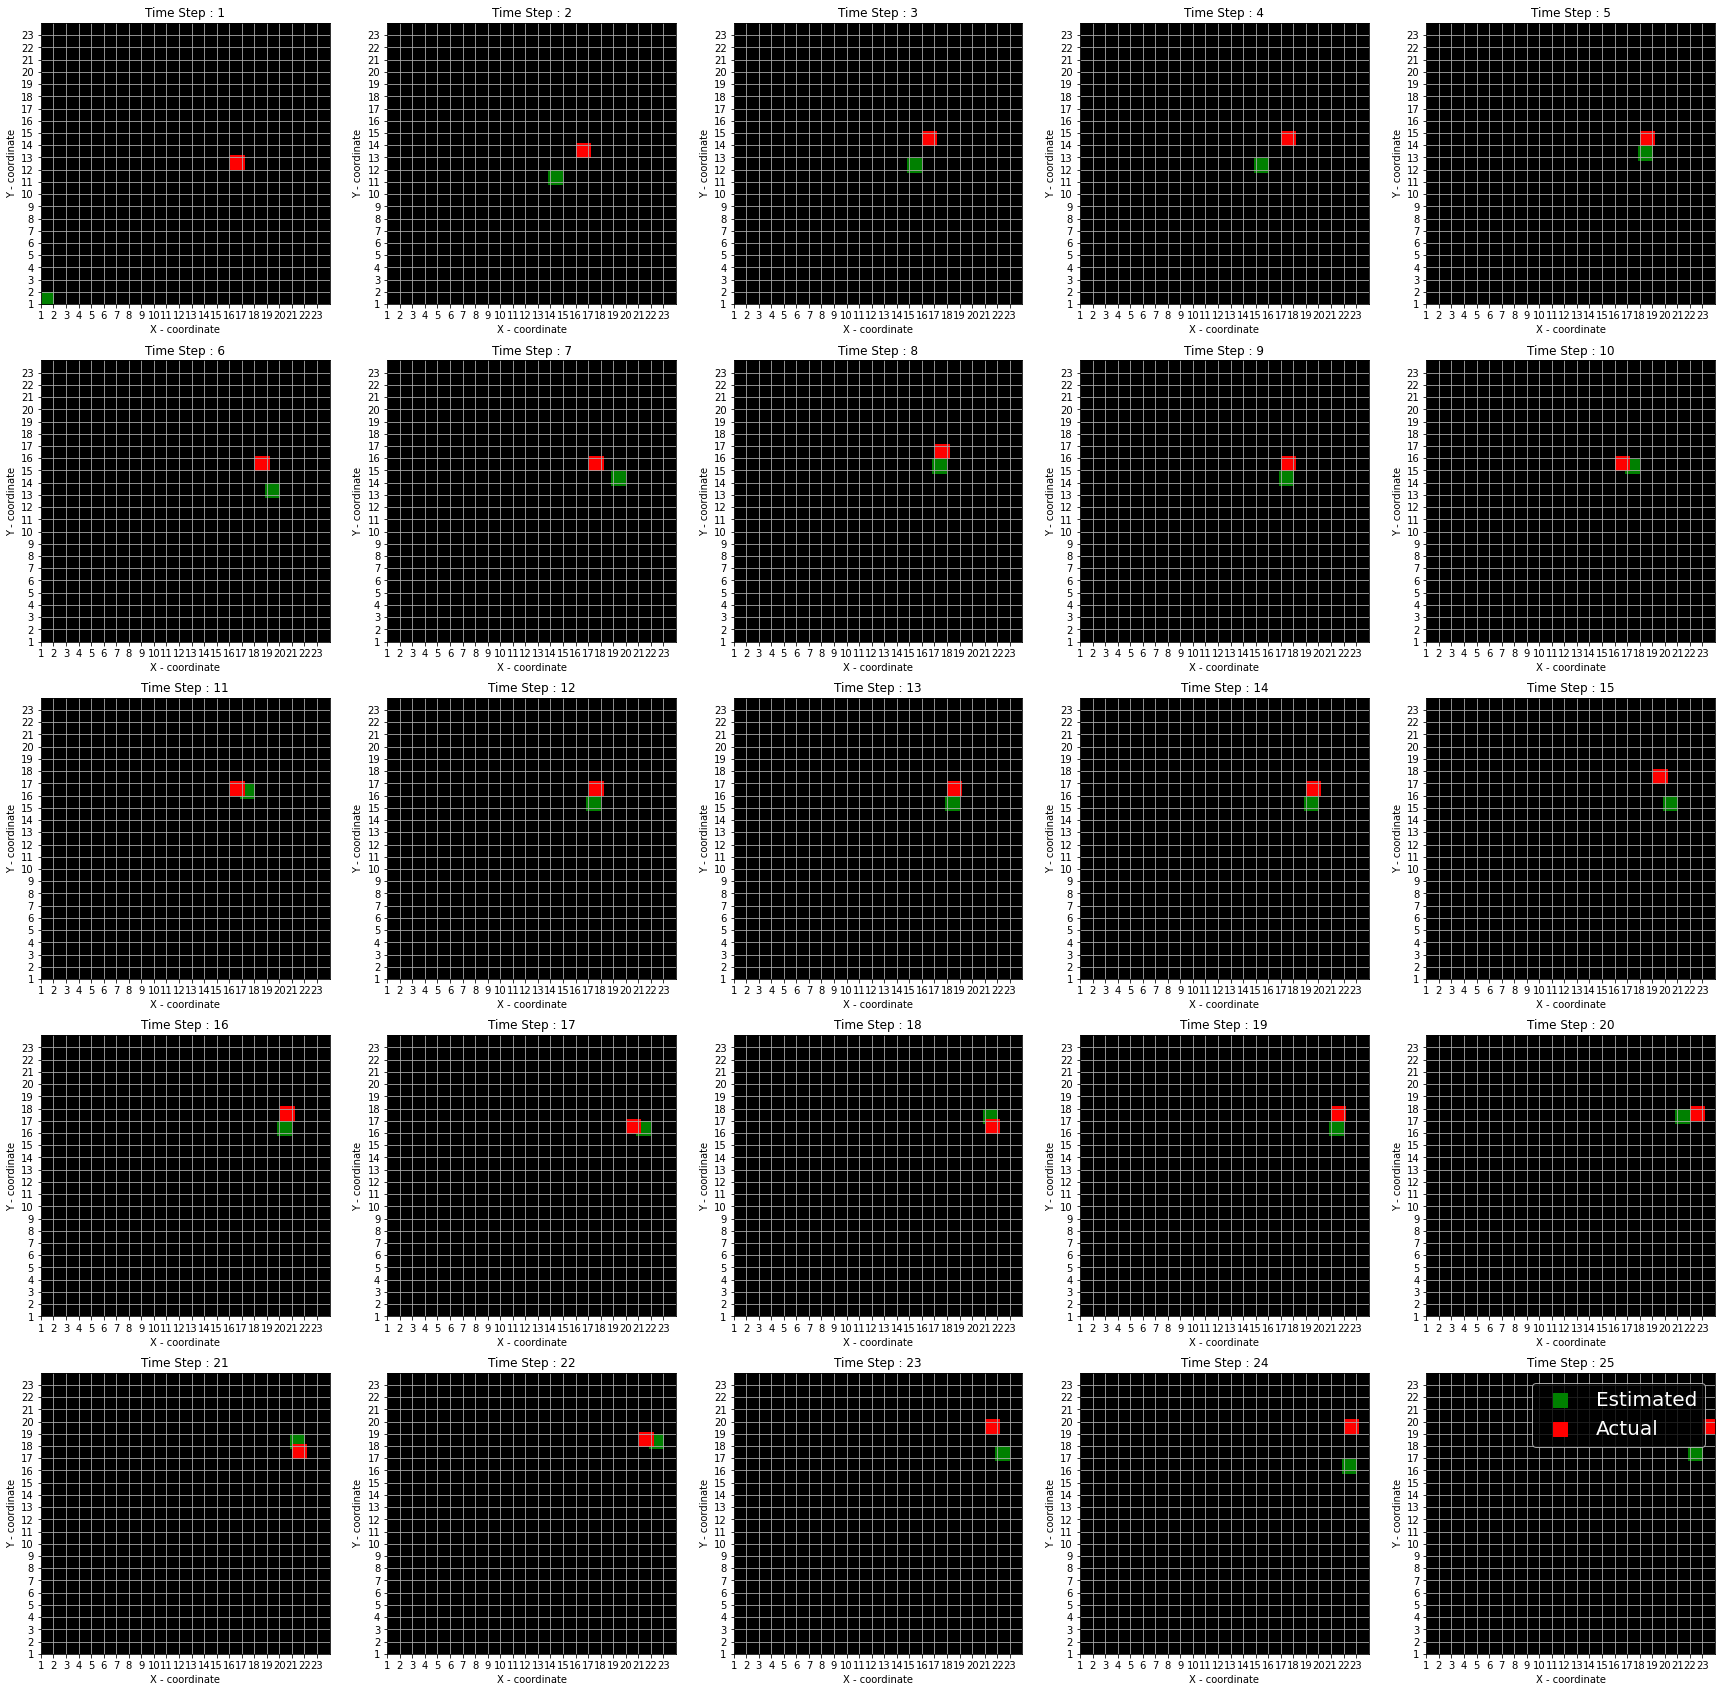

In [ ]:
plot_b(path,belief)


In [ ]:
def plot_b_2(belief,T):
  plt.rcParams['axes.facecolor'] = 'white'
  for t in range (0,T+1):
    estimate = np.unravel_index(np.argmax(belief[t],axis = None),belief[t].shape)
    plt.scatter(estimate[0]+0.5,estimate[1]+0.5,s = 100,c = "green")
    plt.text(estimate[0]+0.53, estimate[1]+0.53 , t , fontsize=15)

  # plt.rcParams["figure.figsize"] = (1,12)
  plt.xlim([0,30])
  plt.ylim([0,30])
  plt.xticks(range(0, 30))
  plt.yticks(range(0, 30))
  plt.grid(True)
  plt.rcParams["figure.figsize"] = (30,30)
  plt.show()

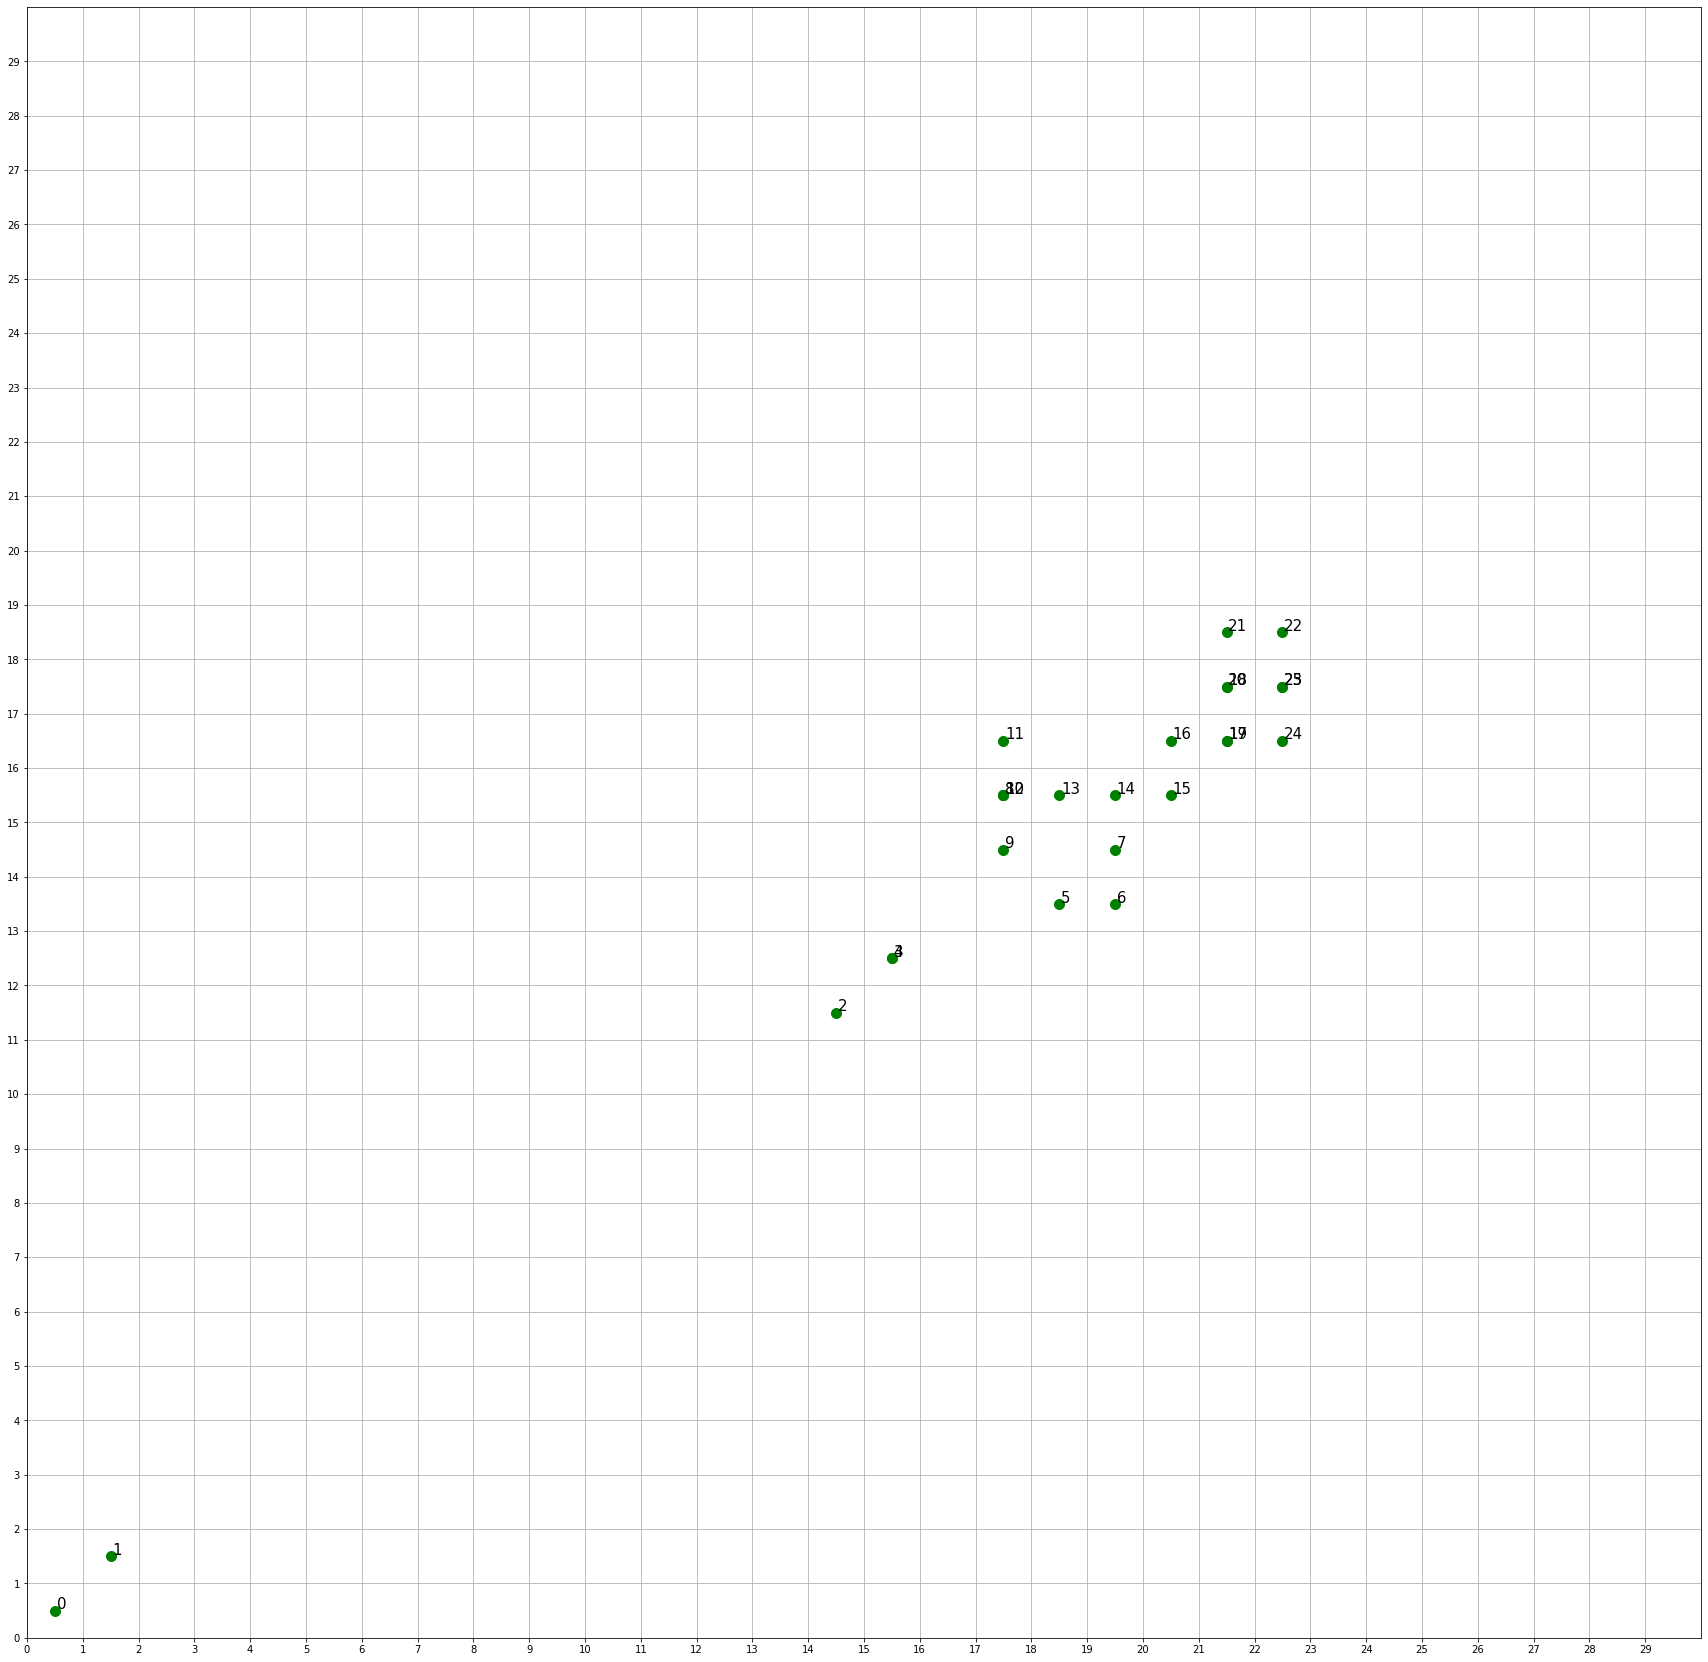

In [ ]:
plot_b_2(belief, T)

## **Part C Plot**

In [ ]:
def plot_c(path,belief, backward,k,T):
  plt.scatter(path[k][0]+0.5,path[k][1]+0.5,s = 100,c = "red")
  plt.text(path[k][0]+0.53, path[k][1]+.53, "True" , fontsize=15)

  estimate = np.unravel_index(np.argmax(smoothing(backward,belief,k,T),axis = None),smoothing(backward,belief,k,T).shape)
  plt.scatter(estimate[0]+0.5,estimate[1]+0.5,s = 100,c = "green")
  plt.text(estimate[0]+0.53, estimate[1]+0.53 , "Smooth" , fontsize=15)

  # plt.rcParams["figure.figsize"] = (1,12)
  plt.xlim([0,30])
  plt.ylim([0,30])
  plt.xticks(range(0, 30))
  plt.yticks(range(0, 30))
  plt.grid(True)
  plt.rcParams["figure.figsize"] = (10,10)
  plt.show()

In [ ]:
def plot_c_2(belief,backward,T):

  for t in range (0,T+1):
    estimate = np.unravel_index(np.argmax(smoothing(backward,belief,t,T),axis = None),smoothing(backward,belief,t,T).shape)
    plt.scatter(estimate[0]+0.5,estimate[1]+0.5,s = 100,c = "green")
    plt.text(estimate[0]+0.53, estimate[1]+0.53 , t , fontsize=15)

  # plt.rcParams["figure.figsize"] = (1,12)
  plt.xlim([0,30])
  plt.ylim([0,30])
  plt.xticks(range(0, 30))
  plt.yticks(range(0, 30))
  plt.grid(True)
  plt.rcParams["figure.figsize"] = (10,10)
  plt.show()

26


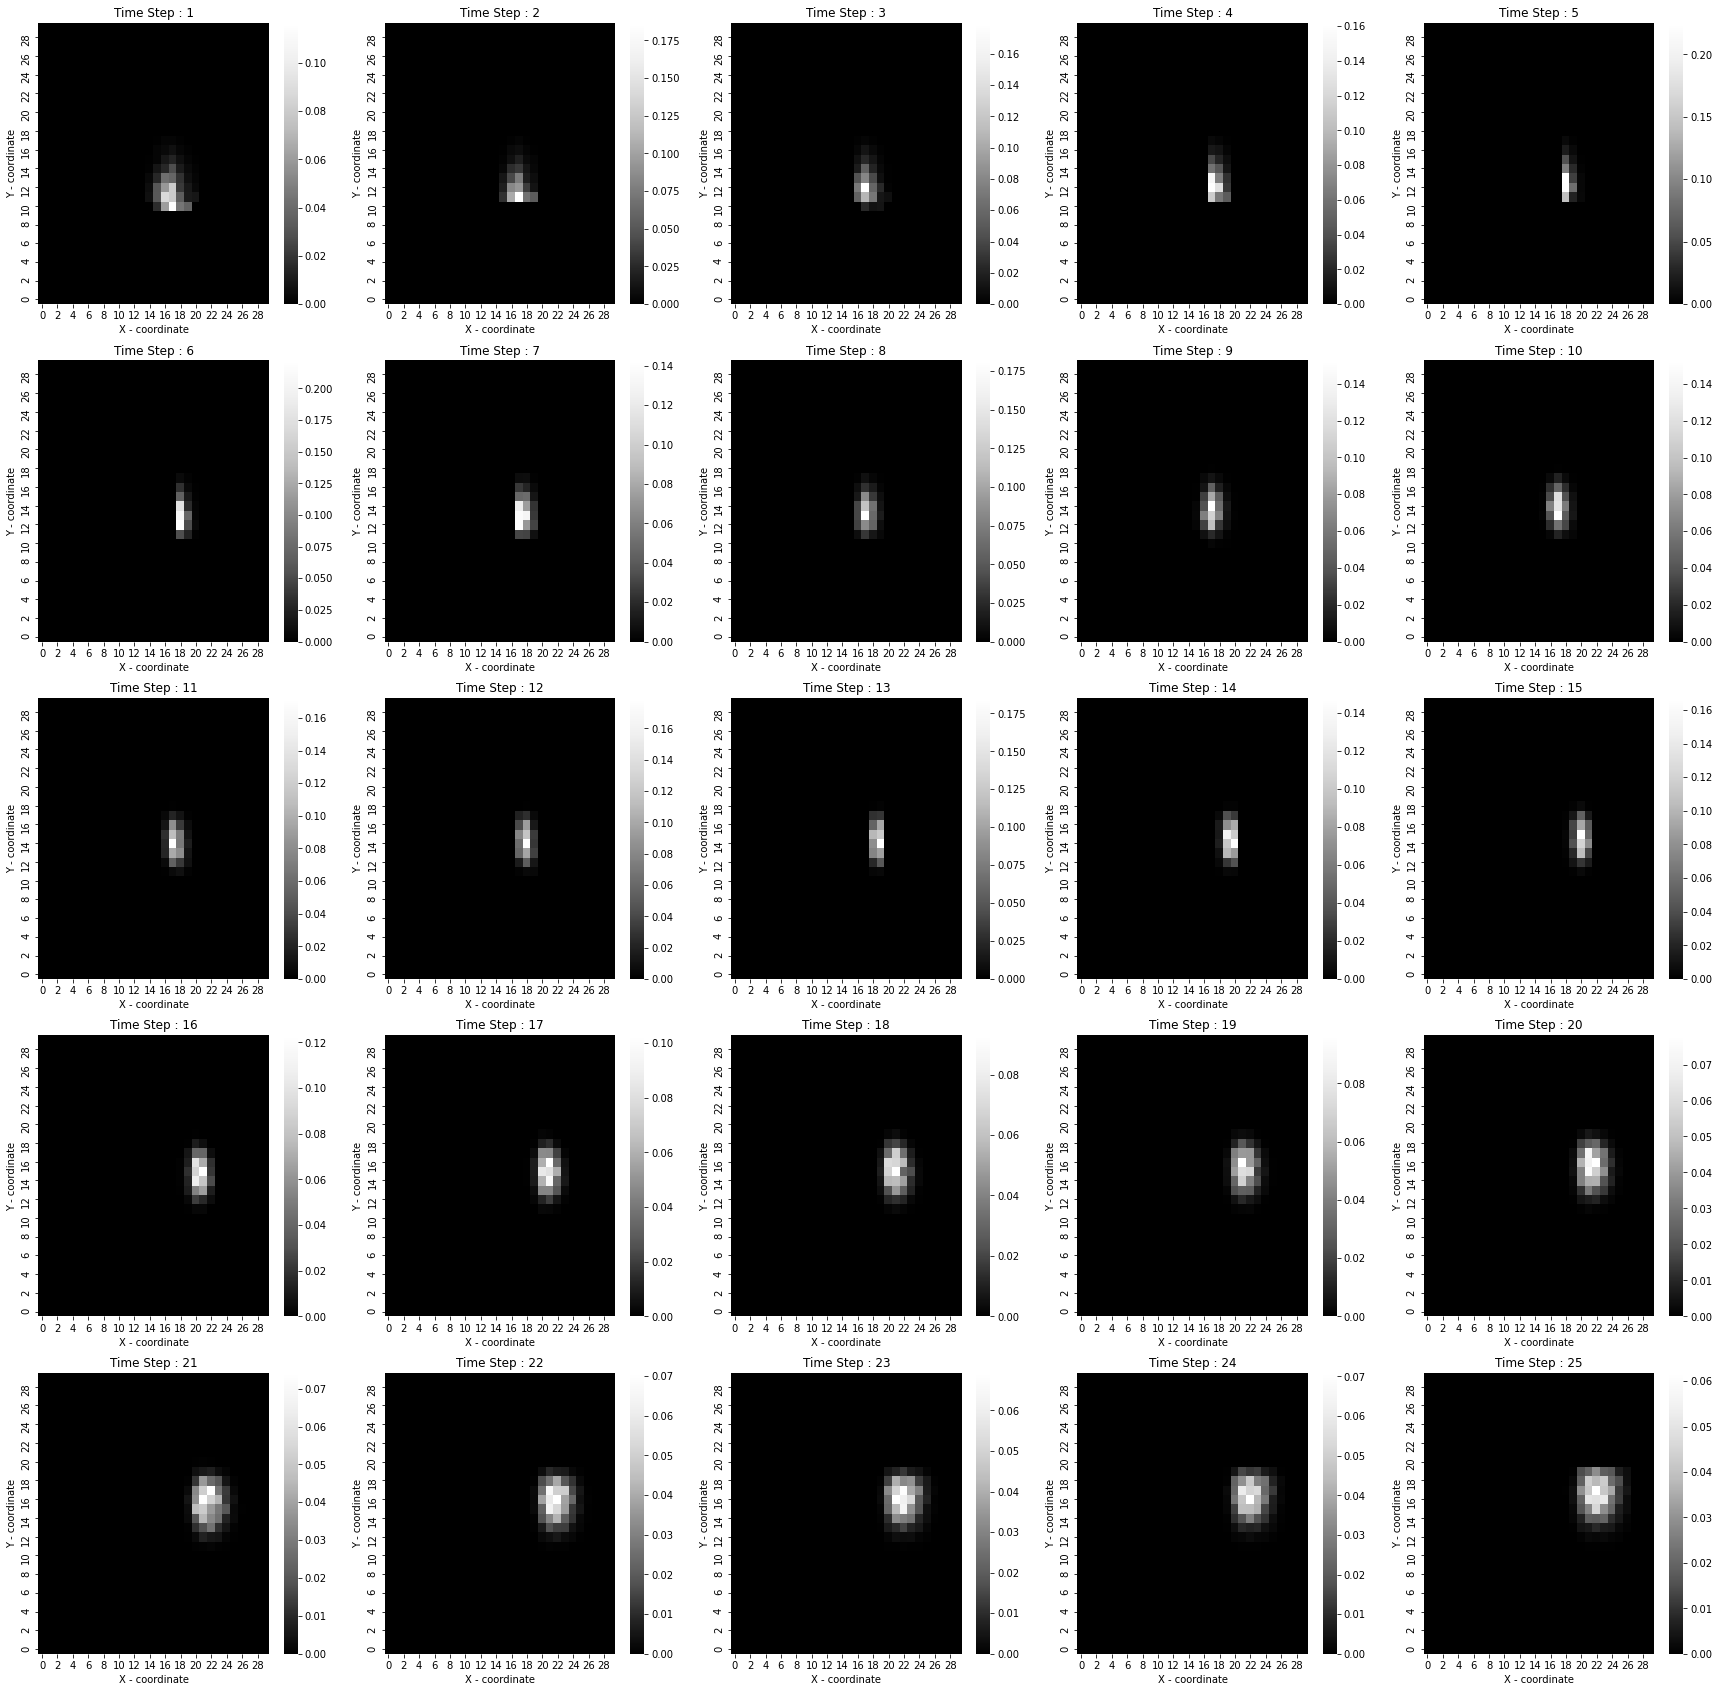

In [ ]:

smoothing_list = []
for i in range(0,T+1):
  smoothing_list.append(smoothing(backward,belief,i,T))
print(len(smoothing_list))
for i in range(1,T+1):
  plt.subplot(5,5,i)
  heat_map(smoothing_list,i)
  plt.title(f'Time Step : {i}')
  plt.xlabel("X - coordinate")
  plt.ylabel("Y - coordinate")

In [ ]:
def plot_c(path,belief):
  L = path.shape[0]
  max_val = -1
  max_x=0
  min_x=29
  max_y=0
  min_y=29
  legend = plt.legend()
  plt.setp(legend.get_texts(), color='w')
  for i in range(1,L):
    estimate = np.unravel_index(np.argmax(belief[i],axis = None),belief[i].shape)
    # print(estimate[0]," ", estimate[1])
    max_x = max(path[i][0],estimate[0],max_x)
    min_x = min(path[i][0],estimate[0],min_x)
    max_y = max(path[i][1],estimate[1],max_y)
    min_y = min(path[i][1],estimate[1],min_y)
  for i in range(1,L):
    plt.rcParams['axes.facecolor'] = 'black'
    plt.subplot(5,5,i)
    estimate = np.unravel_index(np.argmax(belief[i],axis = None),belief[i].shape)
    plt.scatter(estimate[0]+0.4,estimate[1]+0.4,s = 200,c = "green", marker = "s", label = "Smooth")
    plt.scatter(path[i][0]+0.6,path[i][1]+0.6,s = 200,c = "red", marker = "s", label = "Actual")
    # plt.text(path[i][0]+0.53, path[i][1]+.53, i , fontsize=15)
    plt.title(f'Time Step : {i}')
    
    plt.xlabel("X - coordinate")
    plt.ylabel("Y - coordinate")

    plt.grid(True) 
    # plt.legend(["Estimated","Actual"])
    
    plt.xlim([int(min(min_x,min_y)),int(max(max_x,max_y))+1])
    plt.ylim([int(min(min_x,min_y)),int(max(max_x,max_y))+1])
    plt.xticks(range(int(min(min_x,min_y)),int(max(max_x,max_y))+1))
    plt.yticks(range(int(min(min_x,min_y)),int(max(max_x,max_y))+1))
     

  # for s in sensors:
  #   plt.scatter(s[0]+0.5,s[1]+0.5,s = 100,c = "green")
  #   plt.text(s[0]+0.53, s[1]+0.53 , "s" , fontsize=15)
  #   max_val = max(max_val,max(s[0],s[1]))

  legend = plt.legend(prop={"size":20})
  plt.setp(legend.get_texts(), color='w')
  plt.rcParams["figure.figsize"] = (30,30)
  plt.show()
  


No handles with labels found to put in legend.


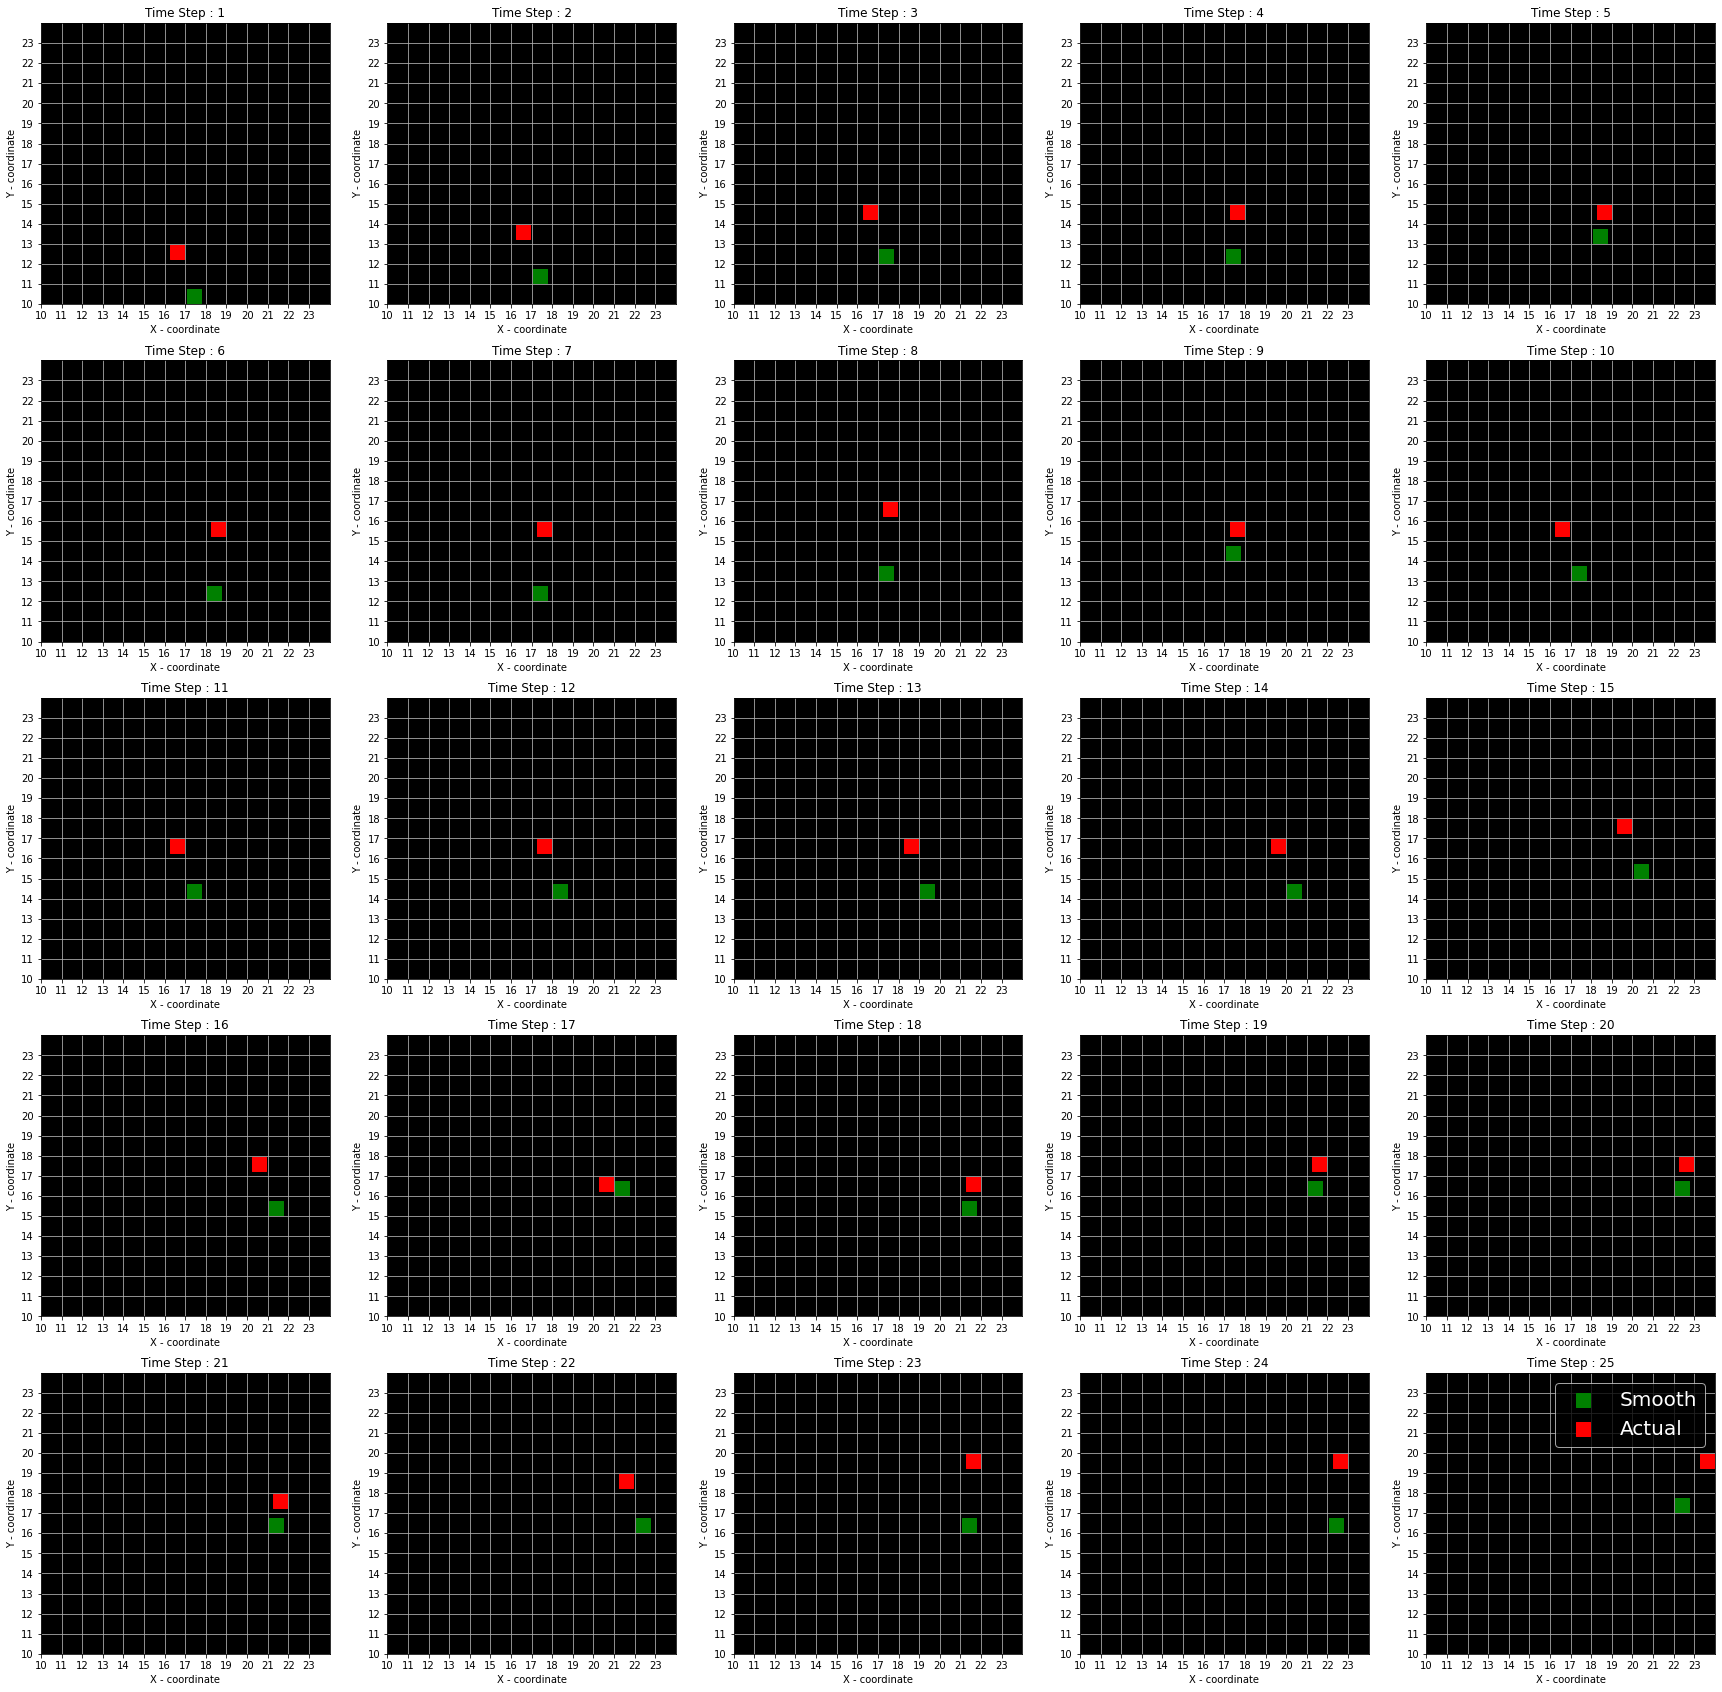

In [ ]:
plot_c(path,smoothing_list)

In [ ]:
#       plot_c(path,belief,backward,1,T)

In [ ]:
# plot_c(path,belief,backward,2,T)

In [ ]:
# plot_c(path,belief,backward,3,T)

In [ ]:
# plot_c_2(belief, backward, T)

## **Part D Manhattan**

In [ ]:
def manhattan_distance(path_original,path_estimated):
  return np.sum(abs(path_original-path_estimated))
path_b = []
path_c = []
for t in range(0,T+1):
  path_b.append(np.unravel_index(np.argmax(belief[t],axis = None),belief[t].shape))
  path_c.append(np.unravel_index(np.argmax(smoothing(backward,belief,t,T),axis = None),smoothing(backward,belief,t,T).shape))


In [ ]:
manhattan_distance(path,path_b)

97.0

In [ ]:
manhattan_distance(path,path_c)

63.0

## **Part D Plot**

In [ ]:
def plot_d(path_original,path_estimated,T):
  y=[]
  plt.rcParams['axes.facecolor'] = 'white'
  for t in range(0,T+1):
    y.append(abs(path_original[t][0]-path_estimated[t][0])+abs(path_original[t][1]-path_estimated[t][1]))
  x = np.arange(0,T+1,1)
  plt.plot(x,y)
  plt.xlim([0,60])
  plt.ylim([0,60])
  plt.xlabel("Time ")
  plt.ylabel("Manhattan Distance")
  plt.rcParams["figure.figsize"] = (10,10)
  plt.show()

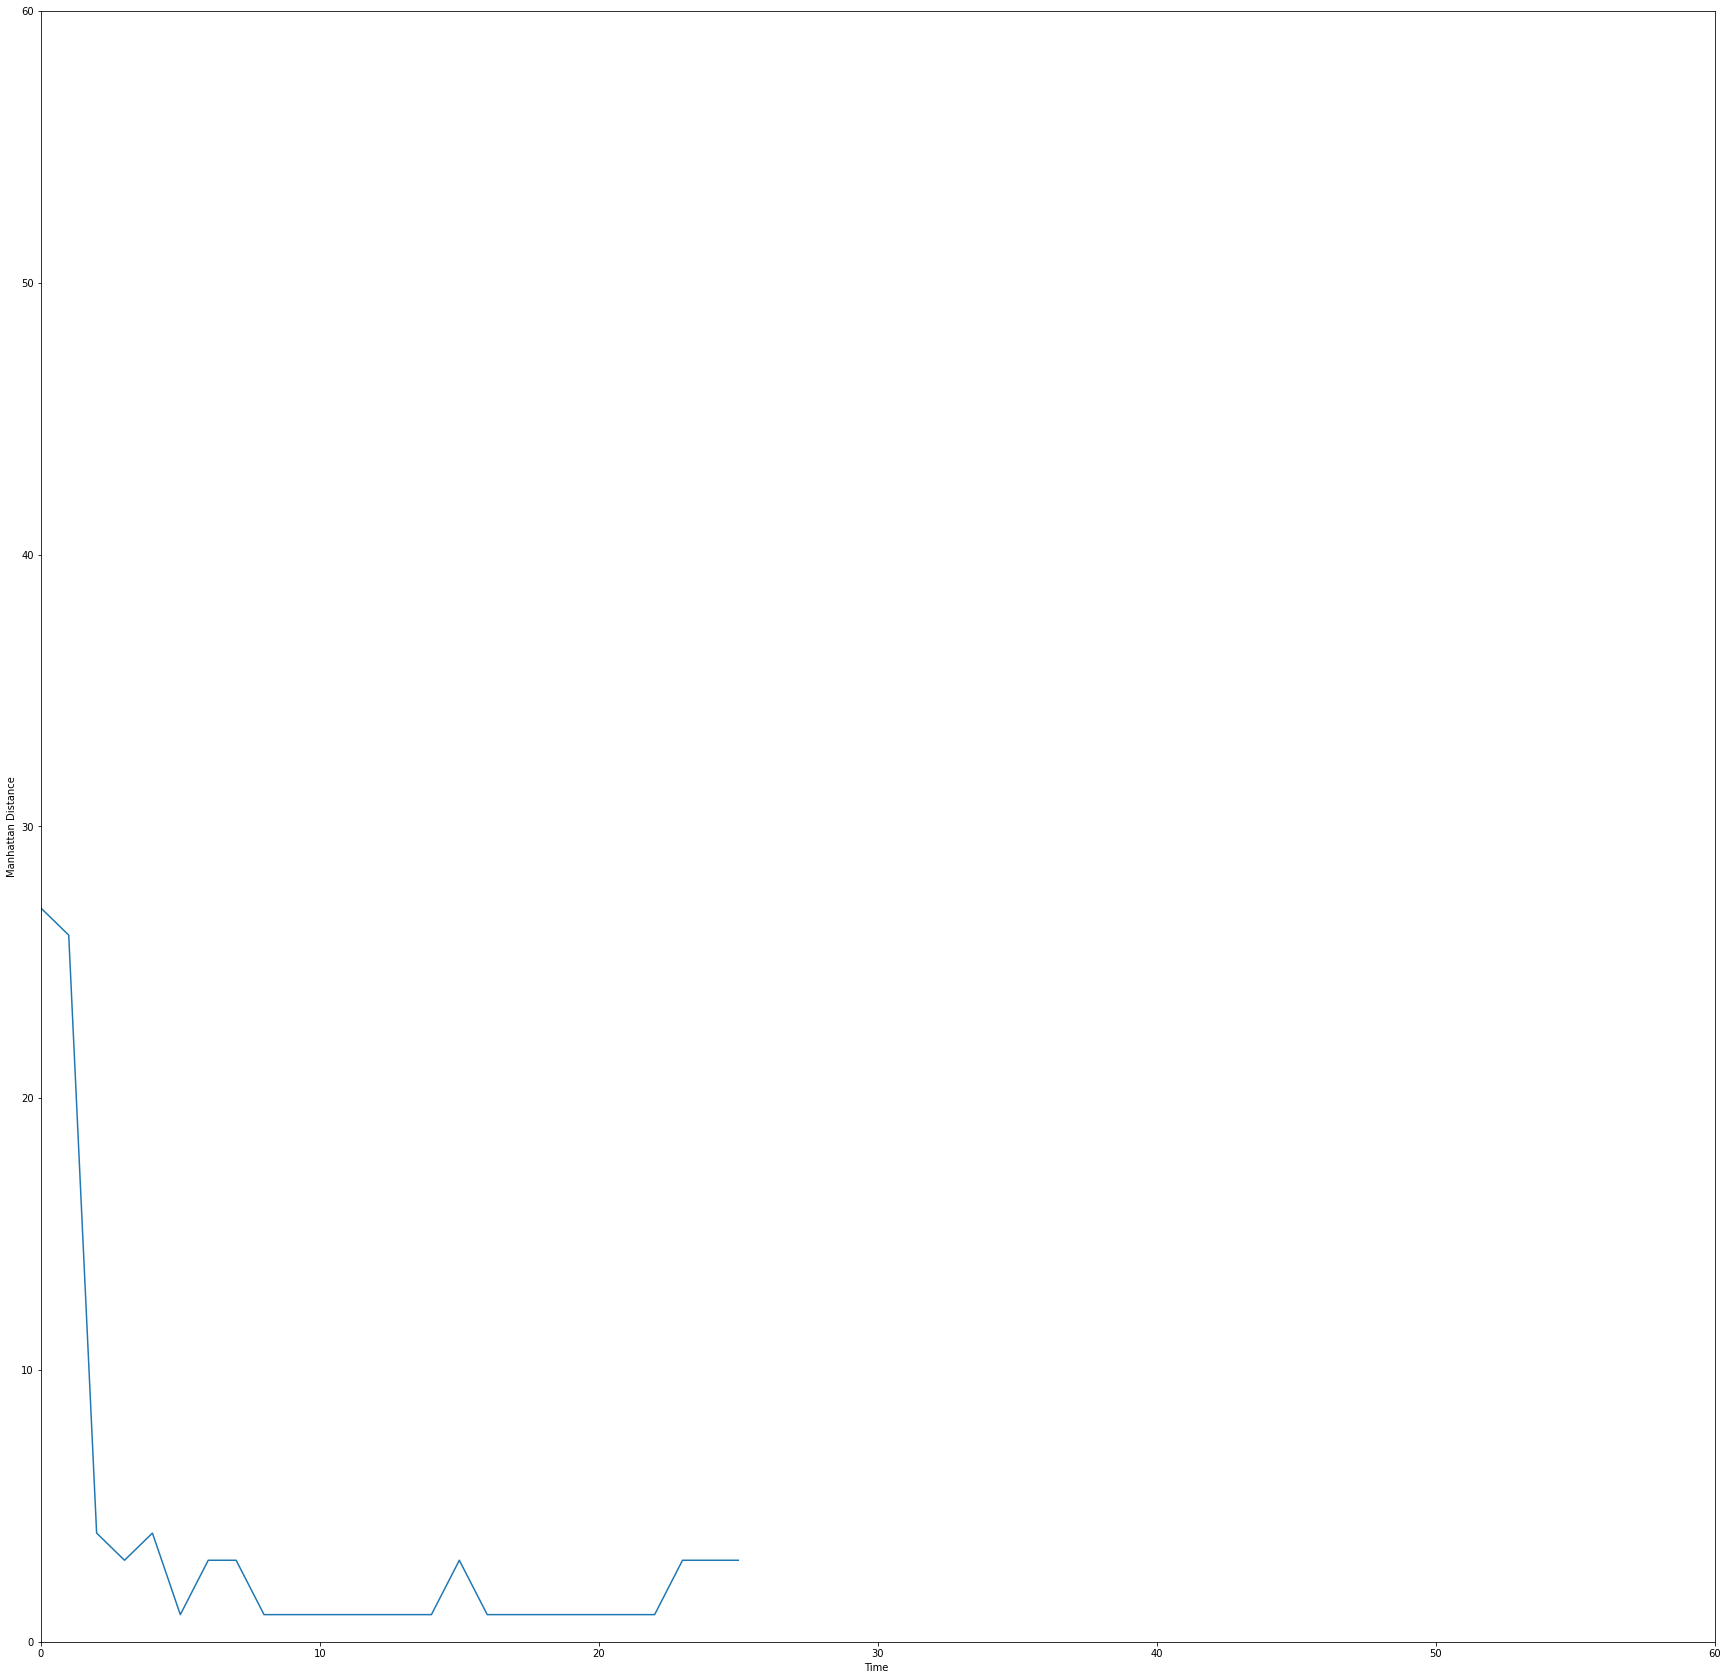

In [ ]:
plot_d(path,path_b,T)

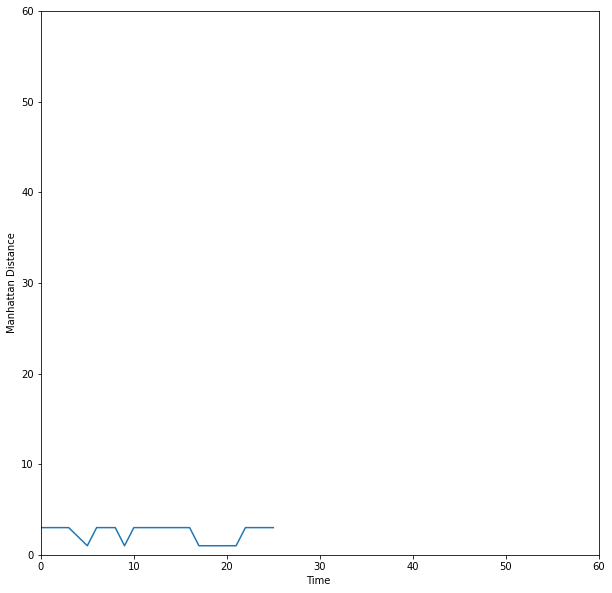

In [ ]:
plot_d(path,path_c,T)

## **Part E Plot**

In [ ]:
T_f = 30
future_belief = np.ndarray((T_f+1,30,30))
future_belief[0] = belief[T]
for i in range (1,T_f+1):
  future_belief[i] = update_future(future_belief[i-1])

In [ ]:
def plot_e(belief,t): 
  x = y = np.arange(0, 30, 1)
  X, Y = np.meshgrid(x, y)
  # belief_clip = np.clip(belief, a_min = 0, a_max = 1)
  # Z = belief_clip[t]
  fig = plt.figure(figsize = ((30,t*6/5)))
  for i in range(1,t+1):
    Z = belief[i]

    
    ax = fig.add_subplot(t/5, 5, i, projection='3d')
    ax.text2D(0.5, 0.95, "Time Step: " + str(i), transform=ax.transAxes)
    # syntax for 3-D plotting
    ax.set_xlabel("X - coordinate")
    ax.set_ylabel("Y - coordinate")
    ax.set_zlabel("Predictive Likelihood")  
      
    # syntax for plotting 
    ax.plot_surface(X,Y,Z,rstride=1, cstride=1,
                  cmap='summer', edgecolor='none')  
 
  plt.show() 

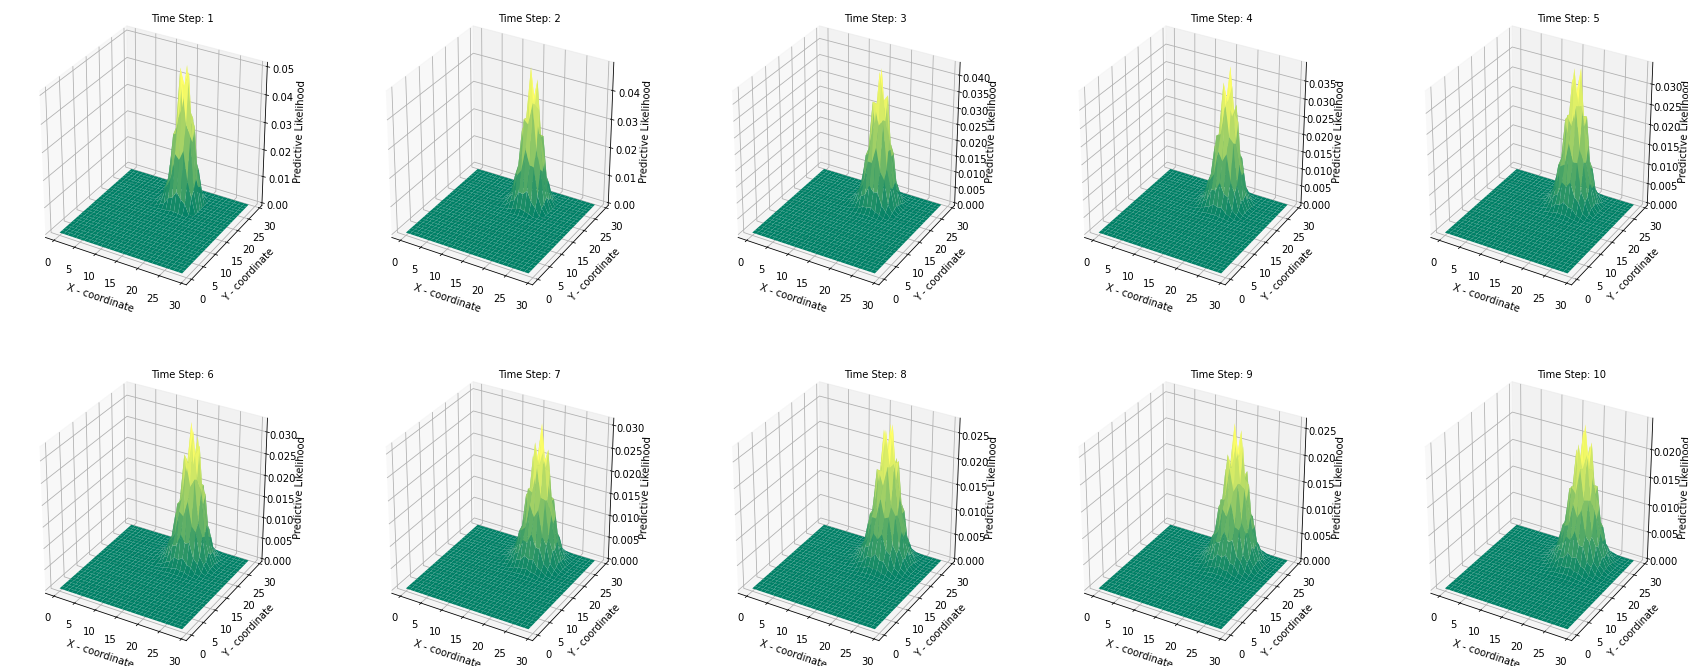

In [ ]:
plot_e(future_belief,10)

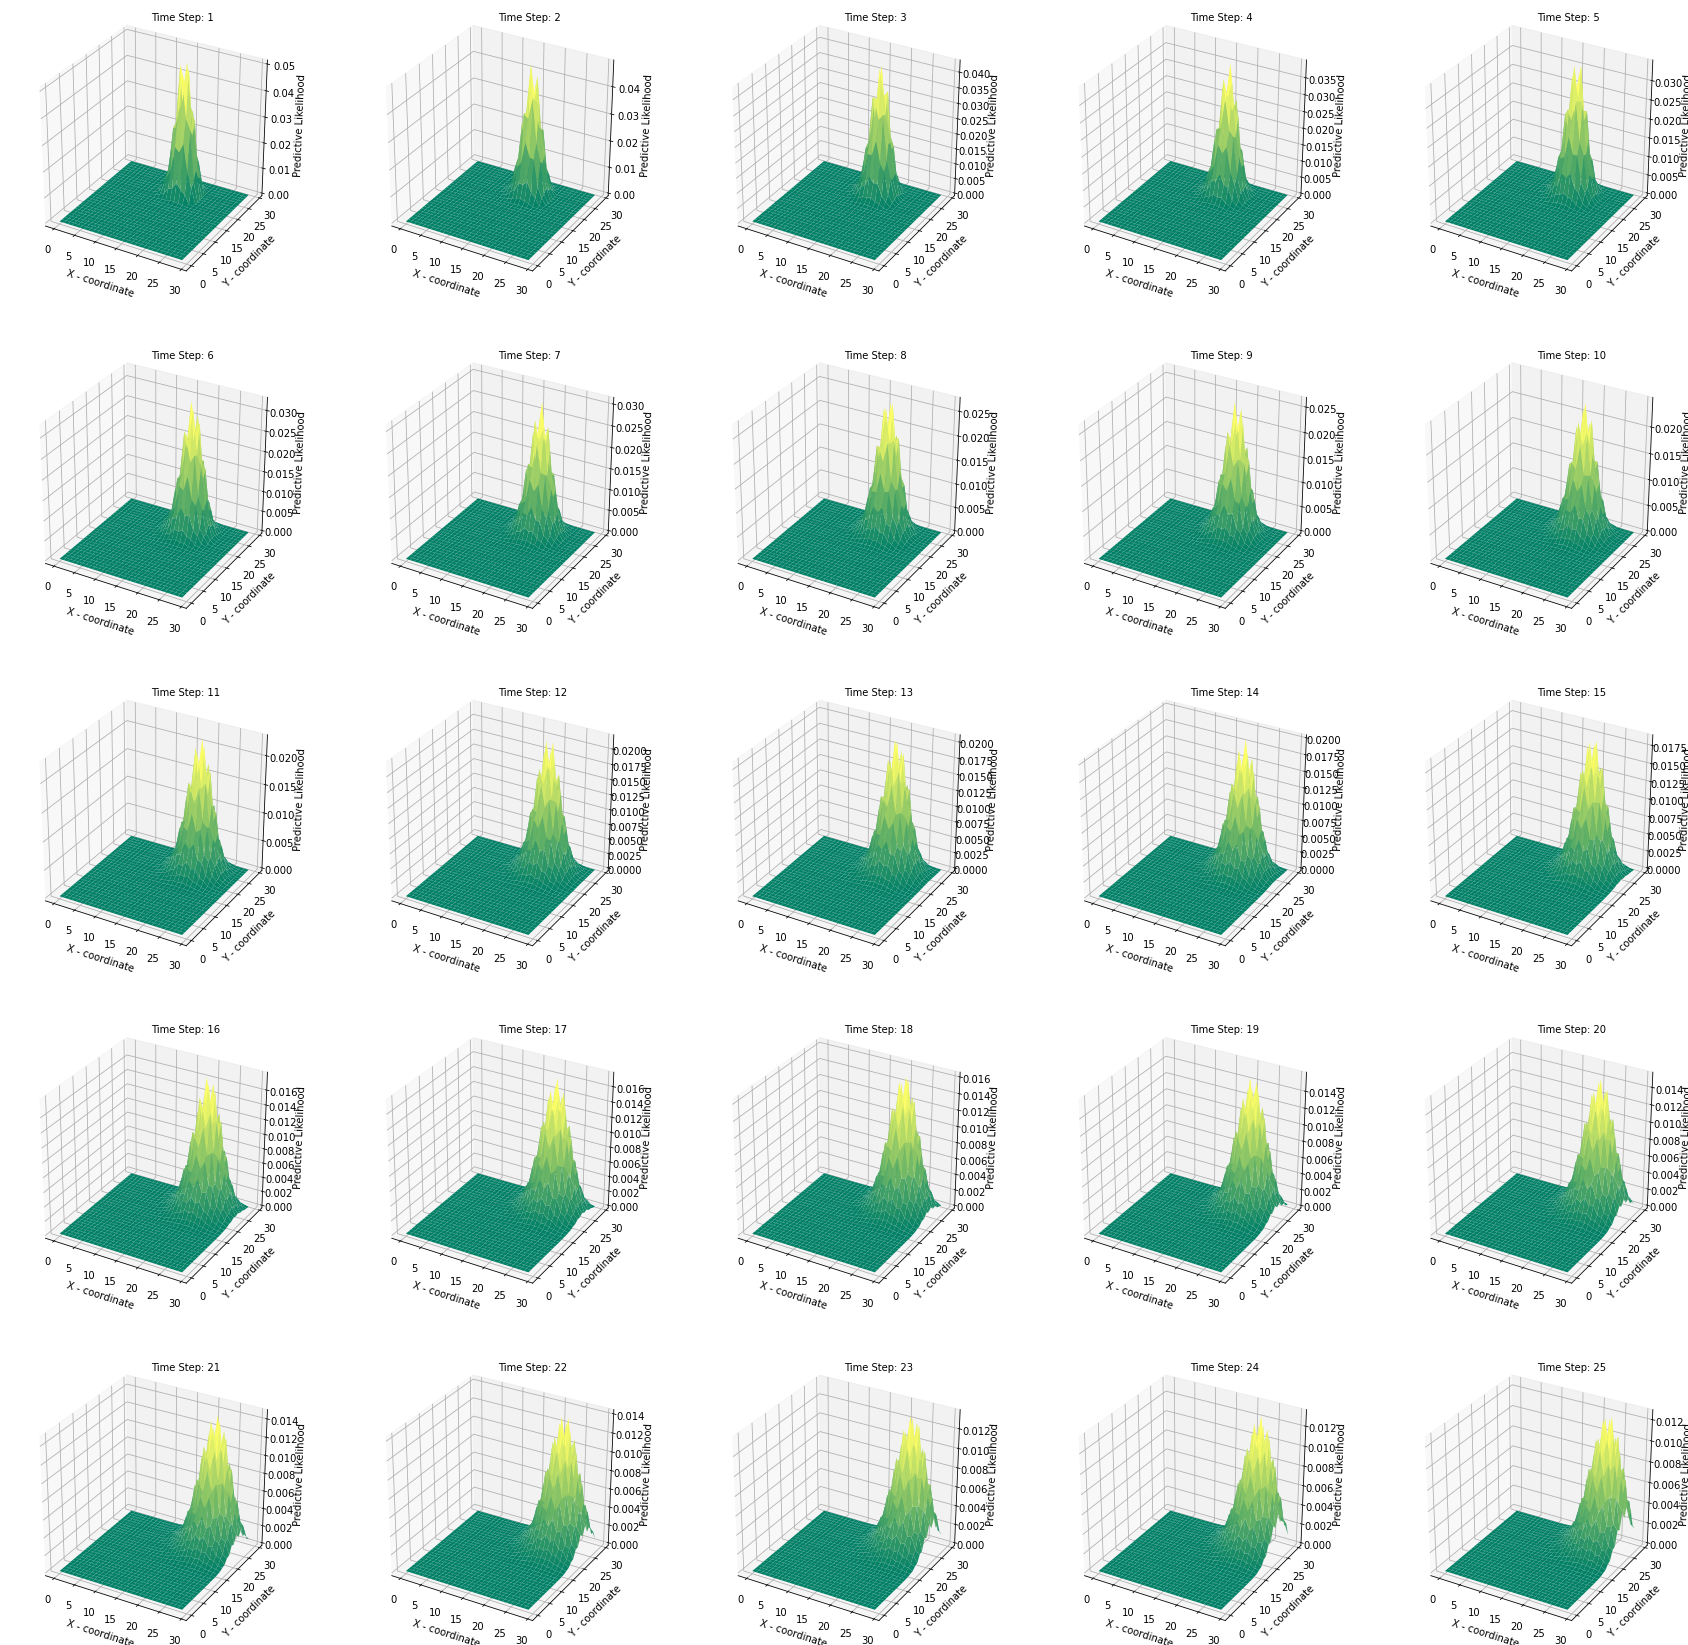

In [ ]:
plot_e(future_belief,25)

# **Part F**

In [ ]:
pmls = np.ndarray((T+1,30,30,2))
pmls[0] = np.full((30,30,2),1/900,dtype=float)

for i in range(1,T+1):
  pmls[i] = most_likely_sequence_probability ("action_data",pmls[i-1])
  for j in range (0,len(sensors)):
    pmls[i] = most_likely_sequence_probability("perceptual_data",pmls[i],(sen_obs[i-1][j],sensors[j]))


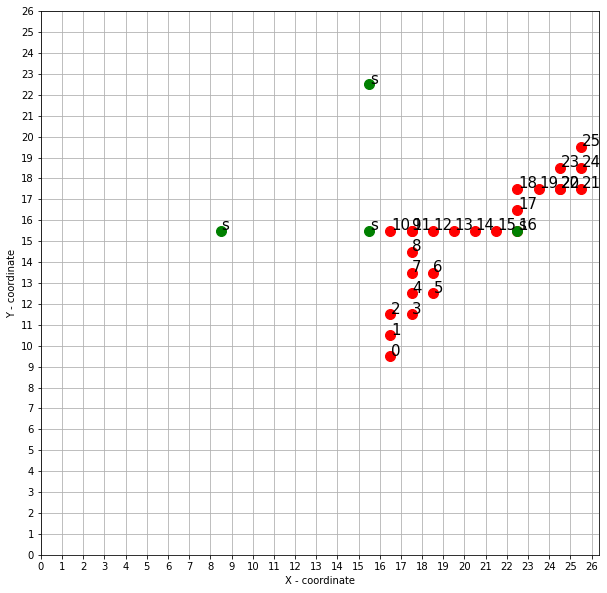

In [ ]:
max_prob = 0
max_i = -1
max_j = -1
prev_state = -1

for i in range(0,30):
  for j in range(0,30):
    if (max_prob < pmls[T][i][j][0]):
      max_prob = pmls[T][i][j][0]
      max_i = i
      max_j = j
      prev_state = pmls[T][i][j][1]

# print(max_i)
# print(max_j)
# print(max_prob)

mlp = []
mlp.append((max_i,max_j))

for i in range (T-1,-1,-1):
  prev_state = int(prev_state)
  prev_j = prev_state%30
  prev_i = int(prev_state/30)
  mlp.append((prev_i,prev_j))
  prev_state = pmls[i][prev_i][prev_j][1]

mlp.reverse()

mlp = np.asarray(mlp)

plot_path(mlp,sensors)
# plot_path(path,sensors)


In [ ]:
manhattan_distance(path,mlp)

64.0

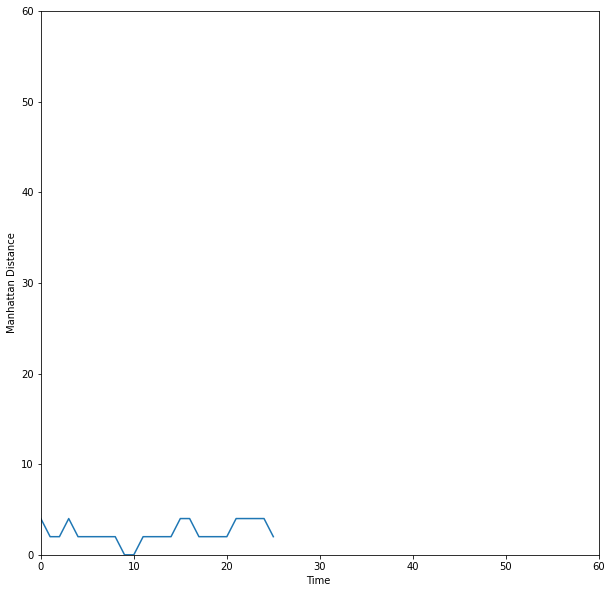

In [ ]:
plot_d(path,mlp,T)

In [ ]:
def plot_compare(path,belief,smoothing_list):
  L = path.shape[0]
  max_val = -1
  max_x=0
  min_x=29
  max_y=0
  min_y=29
  for i in range(L):
    estimate1 = np.unravel_index(np.argmax(belief[i],axis = None),belief[i].shape)
    # plt.scatter(estimate1[0]+0.4,estimate1[1]+0.4,s = 200,c = "green", marker = "s")
    estimate2 = np.unravel_index(np.argmax(smoothing_list[i],axis = None),smoothing_list[i].shape)
    # plt.scatter(estimate2[0]+0.6,estimate2[1]+0.6,s = 200,c = "red", marker = "s")
    # plt.scatter(path[i][0]+0.5,path[i][1]+0.5,s = 200,c = "white", marker = "s")
    max_x = max(max(max(path[i][0],estimate1[0]),max_x),estimate2[0])
    min_x = min(min(min(path[i][0],estimate1[0]),min_x),estimate2[0])
    max_y = max(max(max(path[i][1],estimate1[1]),max_y),estimate2[1])
    min_y = min(min(min(path[i][1],estimate1[1]),min_y),estimate2[1])
  for i in range(1,L):
    plt.rcParams['axes.facecolor'] = 'black'
    plt.subplot(5,5,i)
    estimate1 = np.unravel_index(np.argmax(belief[i],axis = None),belief[i].shape)
    plt.scatter(estimate1[0]+0.4,estimate1[1]+0.4,s = 200,c = "green", marker = "s")
    estimate2 = np.unravel_index(np.argmax(smoothing_list[i],axis = None),smoothing_list[i].shape)
    plt.scatter(estimate2[0]+0.6,estimate2[1]+0.6,s = 200,c = "red", marker = "s")
    plt.scatter(path[i][0]+0.5,path[i][1]+0.5,s = 200,c = "white", marker = "s")
    max_x = max(max(max(path[i][0],estimate1[0]),max_x),estimate2[0])
    min_x = min(min(min(path[i][0],estimate1[0]),min_x),estimate2[0])
    max_y = max(max(max(path[i][1],estimate1[1]),max_y),estimate2[1])
    min_y = min(min(min(path[i][1],estimate1[1]),min_y),estimate2[1])
    # plt.text(path[i][0]+0.53, path[i][1]+.53, i , fontsize=15)
    

    max_val = max(max_val,max(path[i][0],path[i][1]))
    plt.xlim([int(min(min_x,min_y)),int(max(max_x,max_y))+1])
    plt.ylim([int(min(min_x,min_y)),int(max(max_x,max_y))+1])
    plt.xticks(range(int(min(min_x,min_y)),int(max(max_x,max_y))+1))
    plt.yticks(range(int(min(min_x,min_y)),int(max(max_x,max_y))+1))
    plt.grid(True)
    

  # for s in sensors:
  #   plt.scatter(s[0]+0.5,s[1]+0.5,s = 100,c = "green")
  #   plt.text(s[0]+0.53, s[1]+0.53 , "s" , fontsize=15)
  #   max_val = max(max_val,max(s[0],s[1]))

  plt.rcParams["figure.figsize"] = (30,30)

In [ ]:
# plot_compare(path,belief,smoothing_list)

In [ ]:
def plot_compare1(path,mlp):
    L = path.shape[0]
    max_val = -1
    max_x=0
    min_x=29
    max_y=0
    min_y=29
    legend = plt.legend()
    plt.setp(legend.get_texts(), color='w')
    for i in range(L):
      max_x = max(path[i][0],max_x)
      max_x = max(mlp[i][0],max_x)
      min_x = min(path[i][0],min_x)
      min_x = min(mlp[i][0],min_x)
      max_y = max(path[i][1],max_y)
      max_y = max(mlp[i][1],max_y)
      min_y = min(path[i][1],min_y)
      min_y = min(mlp[i][1],min_y)
    for i in range(1,L):
      plt.rcParams['axes.facecolor'] = 'black'
      plt.subplot(5,5,i)
      plt.scatter(path[i][0]+0.4,path[i][1]+0.4,s = 200,c = "white", marker = "s", label = "Actual")
      plt.scatter(mlp[i][0]+0.6,mlp[i][1]+0.6,s = 200,c = "red", marker = "s", label = "Most likely path")
      # plt.text(path[i][0]+0.53, path[i][1]+.53, i , fontsize=15)
      
      plt.title(f'Time Step : {i}')
      plt.xlabel("X - coordinate")
      plt.ylabel("Y - coordinate")
      max_val = max(max_val,max(path[i][0],path[i][1]))
      plt.xlim([int(min(min_x,min_y)),int(max(max_x,max_y))+1])
      plt.ylim([int(min(min_x,min_y)),int(max(max_x,max_y))+1])
      plt.xticks(range(int(min(min_x,min_y)),int(max(max_x,max_y))+1))
      plt.yticks(range(int(min(min_x,min_y)),int(max(max_x,max_y))+1))
      plt.grid(True)
      

    # for s in sensors:
    #   plt.scatter(s[0]+0.5,s[1]+0.5,s = 100,c = "green")
    #   plt.text(s[0]+0.53, s[1]+0.53 , "s" , fontsize=15)
    #   max_val = max(max_val,max(s[0],s[1]))

    # plt.rcParams["figure.figsize"] = (1,12)
    legend = plt.legend(borderpad = 2, prop={"size":20})
    plt.setp(legend.get_texts(), color='w')
    plt.rcParams["figure.figsize"] = (30,30)
    plt.show()

No handles with labels found to put in legend.


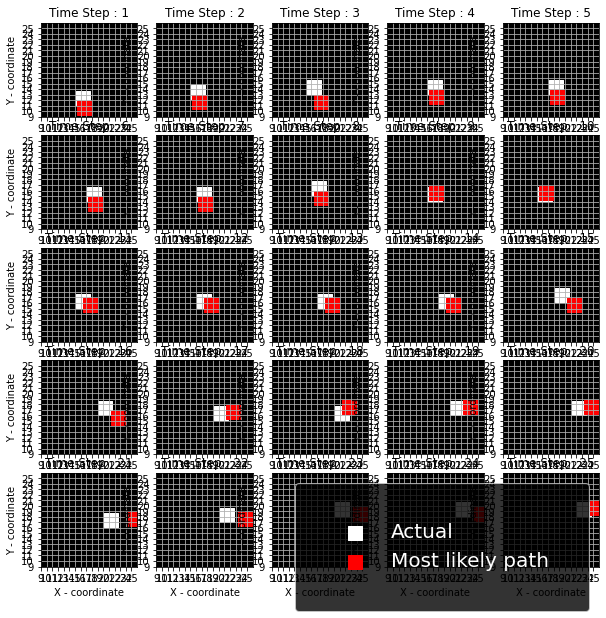

In [ ]:
plot_compare1(path,mlp)